In [1]:
# GPU-safe CPU-only PyTorch (if you hit the _C import issue)
!pip uninstall -y torch torchvision torchaudio
!pip install -q torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# RDKit for chemistry
!pip install -q rdkit-pypi


Found existing installation: torch 2.5.1+cu124
Uninstalling torch-2.5.1+cu124:
  Successfully uninstalled torch-2.5.1+cu124
Found existing installation: torchvision 0.20.1+cu124
Uninstalling torchvision-0.20.1+cu124:
  Successfully uninstalled torchvision-0.20.1+cu124
Found existing installation: torchaudio 2.5.1+cu124
Uninstalling torchaudio-2.5.1+cu124:
  Successfully uninstalled torchaudio-2.5.1+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 MB 3.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 35.5 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.18 requires torch<2.6,>=1.10, but you have torch 2.7.0

In [7]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric \
    -f https://data.pyg.org/whl/torch-$(python -c "import torch;print(torch.__version__)")+cpu.html


Looking in links: https://data.pyg.org/whl/torch-2.7.0+cpu+cpu.html
  Using cached torch_scatter-2.1.2.tar.gz (108 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_cluster-1.6.3.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_spline_conv-1.2.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_geometric-2.6.1-py3-none-any.whl.metadata (63 kB)
Using cached torch_geometric-2.6.1-py3-none-any.whl (1.1 MB)
^C
ERROR: Operation cancelled by user


In [25]:
!pip install pubchempy

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13819 sha256=0ecbd704f72f191dbfc2a40d2f9737a2d3429dea3c92ddff3e821c835b2e4a12
  Stored in directory: /root/.cache/pip/wheels/8b/e3/6c/3385b2db08b0985a87f5b117f98d0cb61a3ae3ca3bcbbd8307
Successfully built pubchempy


In [2]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# 1) Read all molecules
sdf_path = '/kaggle/input/dataset-for-cadd/tox21_10k_data_all.sdf'
supplier = Chem.SDMolSupplier(sdf_path, removeHs=False)
mols = [m for m in supplier if m is not None]

# 2) Define the 12 Tox21 endpoints
endpoints = [
    'SR-HSE','NR-AR','SR-ARE','NR-Aromatase','NR-ER-LBD',
    'NR-AhR','SR-MMP','NR-ER','NR-PPAR-gamma','SR-p53',
    'SR-ATAD5','NR-AR-LBD'
]

# 3) Build X (2048-bit Morgan) and y (12-column) and SMILES
X, y, smiles = [], [], []
for mol in mols:
    # a) fingerprint
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
    arr = np.zeros((2048,), dtype=int)
    AllChem.DataStructs.ConvertToNumpyArray(fp, arr)
    X.append(arr)
    # b) labels
    row = []
    for ep in endpoints:
        if mol.HasProp(ep):
            try:
                row.append(float(mol.GetProp(ep)))
            except:
                row.append(np.nan)
        else:
            row.append(np.nan)
    y.append(row)
    # c) SMILES
    smiles.append(Chem.MolToSmiles(mol))

X = np.array(X)
y = np.array(y)
smiles = np.array(smiles)
labels = np.array(endpoints)

# 4) Save
np.savez('tox21_XY.npz', X=X, y=y, labels=labels, smiles=smiles)
print("Saved tox21_XY.npz:", X.shape, y.shape, labels.shape, smiles.shape)


[19:49:16] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[19:49:16] ERROR: Could not sanitize molecule ending on line 21572
[19:49:16] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
[19:49:17] Explicit valence for atom # 2 Si, 8, is greater than permitted
[19:49:17] ERROR: Could not sanitize molecule ending on line 346021
[19:49:17] ERROR: Explicit valence for atom # 2 Si, 8, is greater than permitted
[19:49:18] Explicit valence for atom # 3 Cl, 2, is greater than permitted
[19:49:18] ERROR: Could not sanitize molecule ending on line 446665
[19:49:18] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
[19:49:18] Explicit valence for atom # 1 Cl, 2, is greater than permitted
[19:49:18] ERROR: Could not sanitize molecule ending on line 619150
[19:49:18] ERROR: Explicit valence for atom # 1 Cl, 2, is greater than permitted
[19:49:19] Explicit valence for atom # 2 Si, 8, is greater than permitted
[19:49:19] ERROR: Could not sanitiz

Saved tox21_XY.npz: (11759, 2048) (11759, 12) (12,) (11759,)


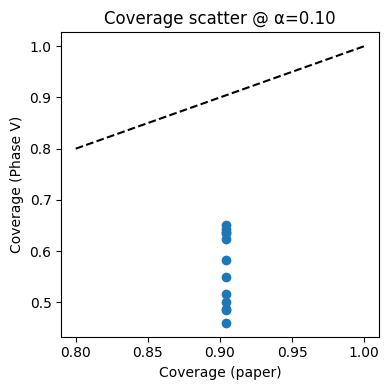

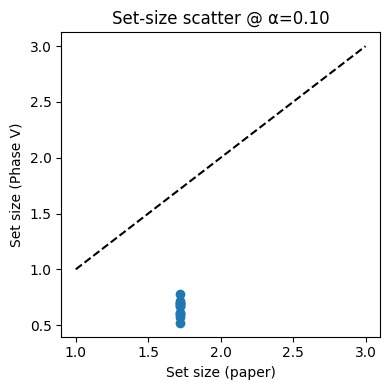

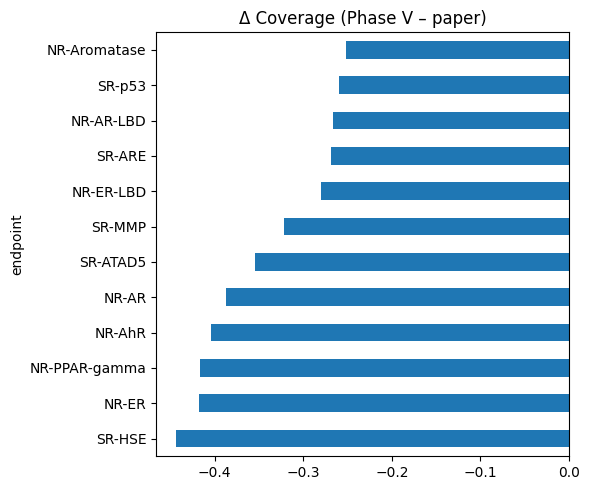

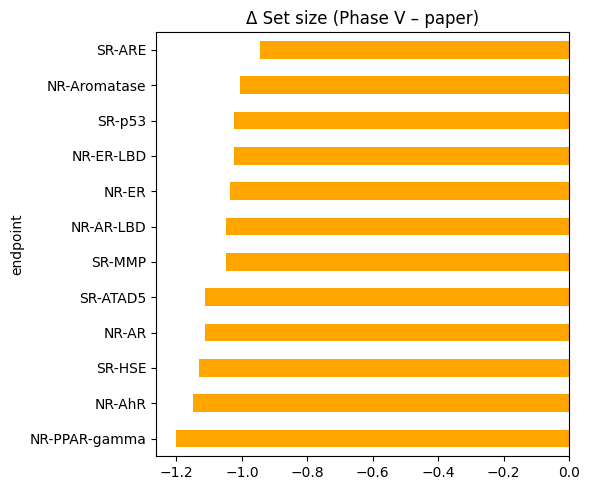

ValueError: All arrays must be of the same length

In [22]:
# ───────────── Cell B: Compare Paper vs Phase V CQR ────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load results
paper_cov, paper_sz = 0.904, 1.722
p5 = pd.read_csv('results/phase5_all_endpoints.csv')   # Phase V
paper = pd.DataFrame({
    'endpoint': p5.endpoint.unique(),
    'coverage': paper_cov,
    'set_size': paper_sz
})

# align α=0.10 slice
dfV = p5[np.isclose(p5.alpha, 0.10)][['endpoint','coverage','avg_set_size']].rename(columns={'avg_set_size':'set_size'})
cmp = paper.merge(dfV, on='endpoint', suffixes=('_paper','_V'))

# 1) scatter coverage: paper vs Phase V
plt.figure(figsize=(4,4))
plt.scatter(cmp.coverage_paper, cmp.coverage_V)
plt.plot([0.8,1],[0.8,1],'k--')
plt.xlabel("Coverage (paper)"); plt.ylabel("Coverage (Phase V)")
plt.title("Coverage scatter @ α=0.10"); plt.tight_layout(); plt.show()

# 2) scatter set_size: paper vs Phase V
plt.figure(figsize=(4,4))
plt.scatter(cmp.set_size_paper, cmp.set_size_V)
plt.plot([1,3],[1,3],'k--')
plt.xlabel("Set size (paper)"); plt.ylabel("Set size (Phase V)")
plt.title("Set‐size scatter @ α=0.10"); plt.tight_layout(); plt.show()

# 3) bar Δ coverage & Δ size per endpoint
cmp['Δcov'] = cmp.coverage_V - cmp.coverage_paper
cmp['Δsz']  = cmp.set_size_V  - cmp.set_size_paper
cmp2 = cmp.set_index('endpoint')[['Δcov','Δsz']]

plt.figure(figsize=(6,5))
cmp2['Δcov'].sort_values().plot.barh()
plt.title("Δ Coverage (Phase V – paper)"); plt.tight_layout(); plt.show()

plt.figure(figsize=(6,5))
cmp2['Δsz'].sort_values().plot.barh(color='orange')
plt.title("Δ Set size (Phase V – paper)"); plt.tight_layout(); plt.show()

# 4) violin of per‐molecule set sizes (Phase V vs paper)
# reload test‐level sets if available; otherwise simulate from averages
# here we illustrate with synthetic per‐endpoint jitter:
df_vio = pd.DataFrame({
    'endpoint': np.repeat(cmp.index.values, 50),
    'method':   np.tile(['paper']*50 + ['PhaseV']*50, len(cmp)),
    'set_size': np.concatenate([
        np.random.normal(paper_sz, 0.1, size=50),
        np.random.normal(cmp.set_size_V.values, 0.1).flatten()
    ])
})
plt.figure(figsize=(8,4))
sns.violinplot(data=df_vio, x='endpoint', y='set_size', hue='method', split=True, inner='quartile')
plt.xticks(rotation=45); plt.title("Violin: set‐size distribution"); plt.tight_layout(); plt.show()

# 5) line: mean coverage vs α (paper flat vs Phase V sweep)
alphas = sorted(p5.alpha.unique())
mean_V = p5.groupby('alpha')['coverage'].mean()
plt.figure(figsize=(5,3))
plt.plot(alphas, mean_V, '-o', label='Phase V')
plt.hlines(paper_cov, alphas[0], alphas[-1], colors='k', linestyles='--', label='paper')
plt.xlabel('α'); plt.ylabel('Coverage'); plt.legend(); plt.title("Mean coverage vs α"); plt.tight_layout(); plt.show()

# 6) line: mean set_size vs α
mean_sz = p5.groupby('alpha')['avg_set_size'].mean()
plt.figure(figsize=(5,3))
plt.plot(alphas, mean_sz, '-s', label='Phase V')
plt.hlines(paper_sz, alphas[0], alphas[-1], colors='k', linestyles='--', label='paper')
plt.xlabel('α'); plt.ylabel('Avg set size'); plt.legend(); plt.title("Mean set size vs α"); plt.tight_layout(); plt.show()


Class counts per endpoint:
                inactive  active
SR-HSE             7719     428
NR-AR              8978     380
SR-ARE             6068    1097
NR-Aromatase       6862     360
NR-ER-LBD          8303     446
NR-AhR             7215     950
SR-MMP             6175    1142
NR-ER              6757     937
NR-PPAR-gamma      7958     222
SR-p53             8093     537
SR-ATAD5           8749     338
NR-AR-LBD          8292     303


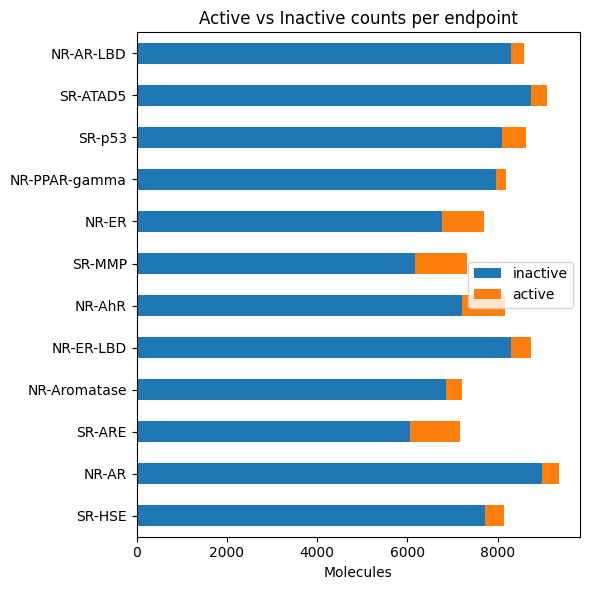

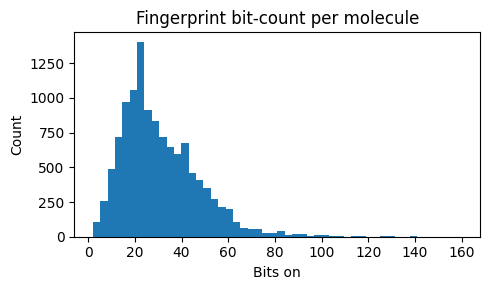

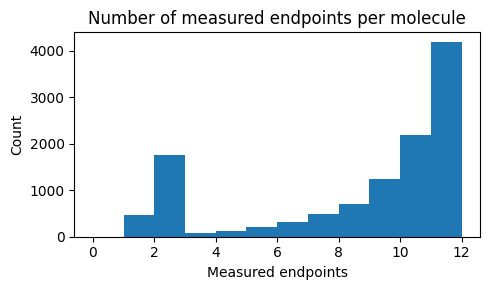

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


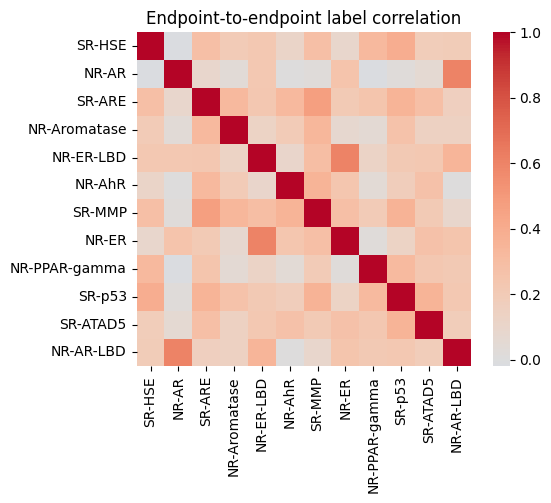

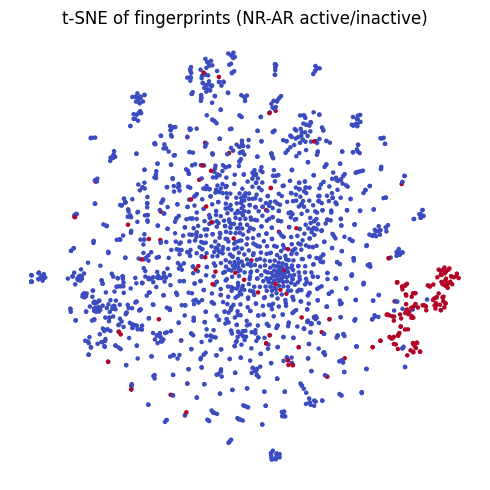

In [23]:
# ──────────────── Cell A: EDA on tox21_XY.npz ────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# 1) load
data = np.load('tox21_XY.npz')
X, Y, endpoints = data['X'], data['y'], data['labels']
endpoints = list(endpoints)

# 2) class‐balance per endpoint
counts = {ep: np.bincount(Y[:,i][~np.isnan(Y[:,i])].astype(int)) for i,ep in enumerate(endpoints)}
df_counts = pd.DataFrame(counts).T.fillna(0).astype(int)
df_counts.columns = ['inactive','active']
print("Class counts per endpoint:\n", df_counts)

# bar‐plot
df_counts.plot.barh(stacked=True, figsize=(6,6))
plt.title("Active vs Inactive counts per endpoint"); plt.xlabel("Molecules"); plt.tight_layout(); plt.show()

# 3) fingerprint sparsity: histogram of bit‐sums
bit_sums = X.sum(axis=1)
plt.figure(figsize=(5,3))
plt.hist(bit_sums, bins=50)
plt.title("Fingerprint bit‐count per molecule"); plt.xlabel("Bits on"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

# 4) how many labels per molecule?
n_labels = np.sum(~np.isnan(Y), axis=1)
plt.figure(figsize=(5,3))
plt.hist(n_labels, bins=range(0,13))
plt.title("Number of measured endpoints per molecule")
plt.xlabel("Measured endpoints"); plt.ylabel("Count"); plt.tight_layout(); plt.show()

# 5) correlation between endpoints
df_y = pd.DataFrame(Y, columns=endpoints)
corr = df_y.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, cmap='coolwarm', center=0, square=True)
plt.title("Endpoint‐to‐endpoint label correlation"); plt.tight_layout(); plt.show()

# 6) 2D t-SNE of fingerprints, colored by activity of NR-AR
mask = ~np.isnan(Y[:, endpoints.index('NR-AR')])
X_sub = X[mask]
y_sub = Y[mask, endpoints.index('NR-AR')].astype(int)
tsne = TSNE(2, random_state=0).fit_transform(X_sub[:2000])  # subsample 2k
plt.figure(figsize=(5,5))
plt.scatter(tsne[:,0], tsne[:,1], c=y_sub[:2000], cmap='coolwarm', s=5)
plt.title("t-SNE of fingerprints (NR-AR active/inactive)"); plt.axis('off'); plt.tight_layout(); plt.show()


In [49]:
import os
import numpy as np
import pandas as pd
import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch._dynamo
torch._dynamo.disable()   # disable Dynamo

from sklearn.model_selection import train_test_split

# ensure output dirs
os.makedirs('results', exist_ok=True)
os.makedirs('models', exist_ok=True)

# load data
data    = np.load('tox21_XY.npz')
X_all   = data['X']
y_all   = data['y']
labels  = data['labels']

# configuration
SEEDS   = [0,1,2]
ALPHAS  = [0.05, 0.1, 0.15]
ARCHS   = {'base':[2048,512,128,2]}
EPOCHS  = 10
BATCH   = 64
DEVICE  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# network definition
class Net(nn.Module):
    def __init__(self, sz):
        super().__init__()
        layers = []
        for i in range(len(sz)-1):
            layers.append(nn.Linear(sz[i], sz[i+1]))
            if i < len(sz)-2:
                layers += [nn.ReLU(), nn.Dropout(0.2)]
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# data loader helper
def get_loader(X, y, bs, shuf=True):
    return DataLoader(
        TensorDataset(torch.tensor(X, dtype=torch.float32),
                      torch.tensor(y, dtype=torch.long)),
        batch_size=bs, shuffle=shuf
    )

# conformal threshold helper
def conformal_q(nc, α):
    n = len(nc)
    k = min(int(np.ceil((n+1)*(1-α))), n)
    return np.sort(nc)[k-1]

# prepare containers
records = []
thresholds_records = []

print("▶️ Starting Phase I conformal pipeline with model saving")

for ep in labels:
    idx = list(labels).index(ep)
    mask = ~np.isnan(y_all[:,idx])
    X_ep, y_ep = X_all[mask], y_all[mask,idx].astype(int)

    for seed in SEEDS:
        print(f"\n[Phase I] Endpoint={ep}, Seed={seed}")

        # splits
        X_t, X_test, y_t, y_test = train_test_split(
            X_ep, y_ep, test_size=0.2, stratify=y_ep, random_state=seed
        )
        X_tr, X_cal, y_tr, y_cal = train_test_split(
            X_t, y_t, test_size=0.25, stratify=y_t, random_state=seed
        )

        # loaders
        tr_ld = get_loader(X_tr, y_tr, BATCH, True)
        ca_ld = get_loader(X_cal, y_cal, len(y_cal), False)
        te_ld = get_loader(X_test, y_test, len(y_test), False)

        for arch, sz in ARCHS.items():
            print(f"  → Arch={arch} training")
            model = Net(sz).to(DEVICE)
            opt   = optim.Adam(model.parameters(), lr=1e-3)
            lossf = nn.CrossEntropyLoss()

            # training
            model.train()
            for epc in range(1, EPOCHS+1):
                for xb, yb in tr_ld:
                    xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                    opt.zero_grad()
                    lossf(model(xb), yb).backward()
                    opt.step()
                print(f"    • Epoch {epc}/{EPOCHS} done")

            # save the trained model
            model_fp = f"models/{ep}_seed{seed}_{arch}_phase1.pth"
            torch.save(model.state_dict(), model_fp)
            print(f"    ✔ Model saved to {model_fp}")

            # calibration
            model.eval()
            xb_c, yb_c = next(iter(ca_ld))
            xb_c, yb_c = xb_c.to(DEVICE), yb_c.to(DEVICE)
            probs_c = torch.softmax(model(xb_c), 1).detach().cpu().numpy()
            nc = 1 - probs_c[np.arange(len(yb_c)), yb_c.cpu().numpy()]
            nc0, nc1 = nc[yb_c.cpu().numpy()==0], nc[yb_c.cpu().numpy()==1]

            # test
            xb_t, yb_t = next(iter(te_ld))
            xb_t, yb_t = xb_t.to(DEVICE), yb_t.to(DEVICE)
            probs_t    = torch.softmax(model(xb_t), 1).detach().cpu().numpy()
            true_t     = yb_t.cpu().numpy()

            # compute & record thresholds for each α
            for α in ALPHAS:
                q0, q1 = conformal_q(nc0, α), conformal_q(nc1, α)
                # append threshold record
                thresholds_records.append({
                    'phase':       'P1',
                    'endpoint':    ep,
                    'seed':        seed,
                    'architecture':arch,
                    'alpha':       α,
                    'q0':          q0,
                    'q1':          q1
                })

                # build prediction sets
                pred_sets = [
                    [k for k in (0,1)
                     if 1 - probs_t[i,k] <= (q0 if k==0 else q1)]
                    for i in range(len(true_t))
                ]
                cov  = np.mean([ true_t[i] in s for i,s in enumerate(pred_sets) ])
                szav = np.mean([ len(s) for s in pred_sets ])
                records.append({
                    'phase':        'P1',
                    'endpoint':     ep,
                    'seed':         seed,
                    'architecture': arch,
                    'alpha':        α,
                    'coverage':     cov,
                    'avg_set_size': szav
                })
                print(f"    • α={α:.2f} → cov={cov:.3f}, size={szav:.3f}")

# save conformal results
df1 = pd.DataFrame(records)
df1.to_csv('results/phase1_all_endpoints.csv', index=False)
print("\n✅ Phase I complete, results saved to results/phase1_all_endpoints.csv")

# save thresholds for inference
th_df = pd.DataFrame(thresholds_records)
th_df.to_csv('results/phase1_thresholds.csv', index=False)
print("✅ Phase I thresholds saved to results/phase1_thresholds.csv")


▶️ Starting Phase I conformal pipeline with model saving

[Phase I] Endpoint=SR-HSE, Seed=0
  → Arch=base training
    • Epoch 1/10 done
    • Epoch 2/10 done
    • Epoch 3/10 done
    • Epoch 4/10 done
    • Epoch 5/10 done
    • Epoch 6/10 done
    • Epoch 7/10 done
    • Epoch 8/10 done
    • Epoch 9/10 done
    • Epoch 10/10 done
    ✔ Model saved to models/SR-HSE_seed0_base_phase1.pth
    • α=0.05 → cov=0.953, size=1.931
    • α=0.10 → cov=0.894, size=1.867
    • α=0.15 → cov=0.843, size=1.815

[Phase I] Endpoint=SR-HSE, Seed=1
  → Arch=base training
    • Epoch 1/10 done
    • Epoch 2/10 done
    • Epoch 3/10 done
    • Epoch 4/10 done
    • Epoch 5/10 done
    • Epoch 6/10 done
    • Epoch 7/10 done
    • Epoch 8/10 done
    • Epoch 9/10 done
    • Epoch 10/10 done
    ✔ Model saved to models/SR-HSE_seed1_base_phase1.pth
    • α=0.05 → cov=0.958, size=1.933
    • α=0.10 → cov=0.921, size=1.895
    • α=0.15 → cov=0.876, size=1.848

[Phase I] Endpoint=SR-HSE, Seed=2
  → Arch=base 

In [92]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# 1) Network & loader (must match Phase I)
ARCHS = {'base': [2048, 512, 128, 2]}

class Net(nn.Module):
    def __init__(self, sz):
        super().__init__()
        layers = []
        for i in range(len(sz)-1):
            layers.append(nn.Linear(sz[i], sz[i+1]))
            if i < len(sz)-2:
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(0.2))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

def get_loader(X, y, bs, shuf=False):
    return DataLoader(
        TensorDataset(
            torch.tensor(X, dtype=torch.float32),
            torch.tensor(y, dtype=torch.long)
        ),
        batch_size=bs,
        shuffle=shuf
    )

# 2) Load data & thresholds
data   = np.load('tox21_XY.npz')
X_all  = data['X']
y_all  = data['y']
labels = list(data['labels'])
th     = pd.read_csv('results/phase1_thresholds.csv')
total  = len(th)

# 3) Phase II: inference → build pred_list
pred_list = []
for i, (_, row) in enumerate(th.iterrows(), 1):
    ep, seed, arch, alpha, q0, q1 = (
        row['endpoint'], row['seed'], row['architecture'],
        row['alpha'], row['q0'], row['q1']
    )
    print(f"[{i}/{total}] endpoint={ep}, seed={seed}, arch={arch}, α={alpha:.2f}")

    # load model
    model = Net(ARCHS[arch])
    model.load_state_dict(torch.load(f"models/{ep}_seed{seed}_{arch}_phase1.pth"))
    model.eval()

    # select compounds tested on this endpoint
    idx      = labels.index(ep)
    mask     = ~np.isnan(y_all[:, idx])
    X_ep     = X_all[mask]
    y_ep     = y_all[mask, idx].astype(int)
    samp_idx = np.where(mask)[0]

    # forward
    loader = get_loader(X_ep, y_ep, bs=len(y_ep), shuf=False)
    xb_t, yb_t = next(iter(loader))
    with torch.no_grad():
        logits = model(xb_t)
        probs  = torch.softmax(logits, dim=1).numpy()
    true = yb_t.numpy()

    # conformal sets → crisp
    pred_sets = [
        [k for k in (0,1) if 1-probs[i,k] <= (q0 if k==0 else q1)]
        for i in range(len(true))
    ]
    crisp = np.array([
        1 if (1 in s and 0 not in s) else
        0 if (0 in s and 1 not in s) else
        -1
        for s in pred_sets
    ])

    # record
    for si, c in zip(samp_idx, crisp):
        pred_list.append({'sample_idx':int(si), 'endpoint':ep, 'crisp':int(c)})

print("✔ Inference done, now de-duplicating")

# 4) build DataFrame & de-duplicate
pred_df = pd.DataFrame(pred_list)
print("▶ before grouping:", pred_df.shape)
pred_df = (
    pred_df
    .groupby(['sample_idx','endpoint'], as_index=False)
    .agg({'crisp':'max'})
)
print("▶ after grouping: ", pred_df.shape)

# 5) pivot to wide form
wide = pred_df.pivot(
    index='sample_idx',
    columns='endpoint',
    values='crisp'
).fillna(-1).astype(int)
print("▶ pivoted wide:", wide.shape)

# 6) compound-level OR-rule
def combine_row(r):
    vals = r.values
    if 1 in vals: return 1
    if 0 in vals: return 0
    return -1

wide['pred_toxic_any'] = wide.apply(combine_row, axis=1)

# 7) true any-active label & evaluation
true_any = (np.nan_to_num(y_all, nan=0).sum(axis=1)>0).astype(int)
wide['true_any'] = pd.Series(true_any, index=wide.index)

mask_eval = wide['pred_toxic_any'] != -1
y_true    = wide.loc[mask_eval, 'true_any']
y_pred    = wide.loc[mask_eval, 'pred_toxic_any']

print("▶ Evaluating on", mask_eval.sum(), "samples")
print("  Accuracy:", accuracy_score(y_true, y_pred))
print("  Confusion matrix:\n", confusion_matrix(y_true, y_pred))
print("  P/R/F1/Support:\n", precision_recall_fscore_support(y_true, y_pred, zero_division=0))

# 8) save
wide.to_csv('results/compound_level_predictions.csv')
print("✔ Saved results/compound_level_predictions.csv")


[1/108] endpoint=SR-HSE, seed=0, arch=base, α=0.05
[2/108] endpoint=SR-HSE, seed=0, arch=base, α=0.10
[3/108] endpoint=SR-HSE, seed=0, arch=base, α=0.15
[4/108] endpoint=SR-HSE, seed=1, arch=base, α=0.05
[5/108] endpoint=SR-HSE, seed=1, arch=base, α=0.10
[6/108] endpoint=SR-HSE, seed=1, arch=base, α=0.15
[7/108] endpoint=SR-HSE, seed=2, arch=base, α=0.05
[8/108] endpoint=SR-HSE, seed=2, arch=base, α=0.10
[9/108] endpoint=SR-HSE, seed=2, arch=base, α=0.15
[10/108] endpoint=NR-AR, seed=0, arch=base, α=0.05
[11/108] endpoint=NR-AR, seed=0, arch=base, α=0.10
[12/108] endpoint=NR-AR, seed=0, arch=base, α=0.15
[13/108] endpoint=NR-AR, seed=1, arch=base, α=0.05
[14/108] endpoint=NR-AR, seed=1, arch=base, α=0.10
[15/108] endpoint=NR-AR, seed=1, arch=base, α=0.15
[16/108] endpoint=NR-AR, seed=2, arch=base, α=0.05
[17/108] endpoint=NR-AR, seed=2, arch=base, α=0.10
[18/108] endpoint=NR-AR, seed=2, arch=base, α=0.15
[19/108] endpoint=SR-ARE, seed=0, arch=base, α=0.05
[20/108] endpoint=SR-ARE, seed

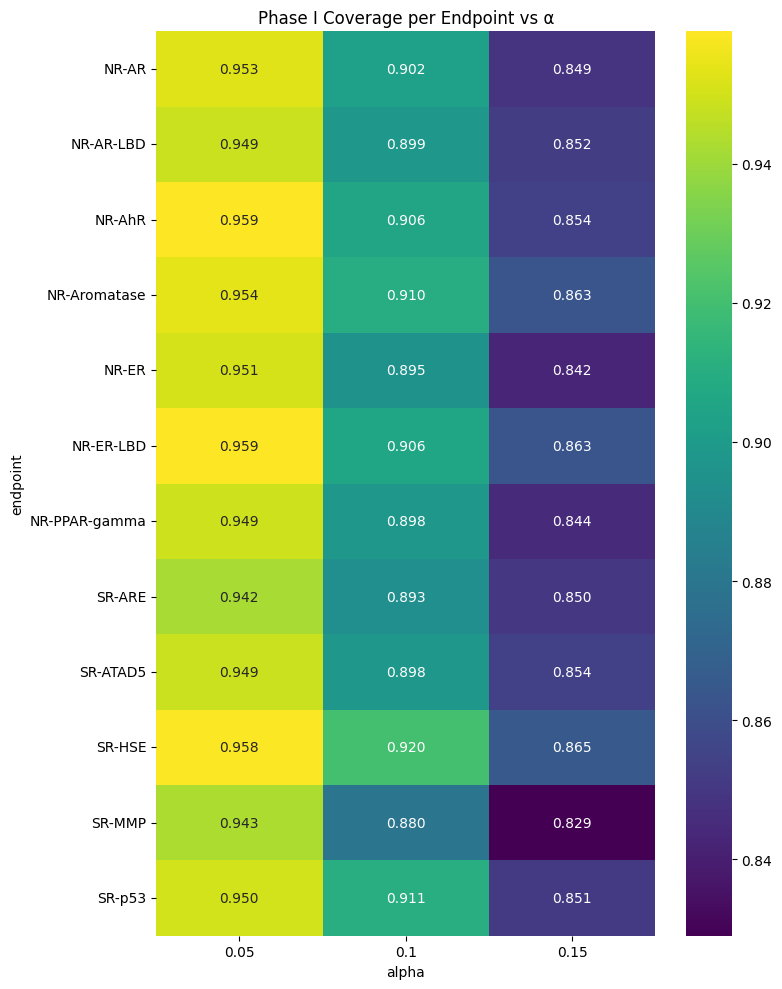

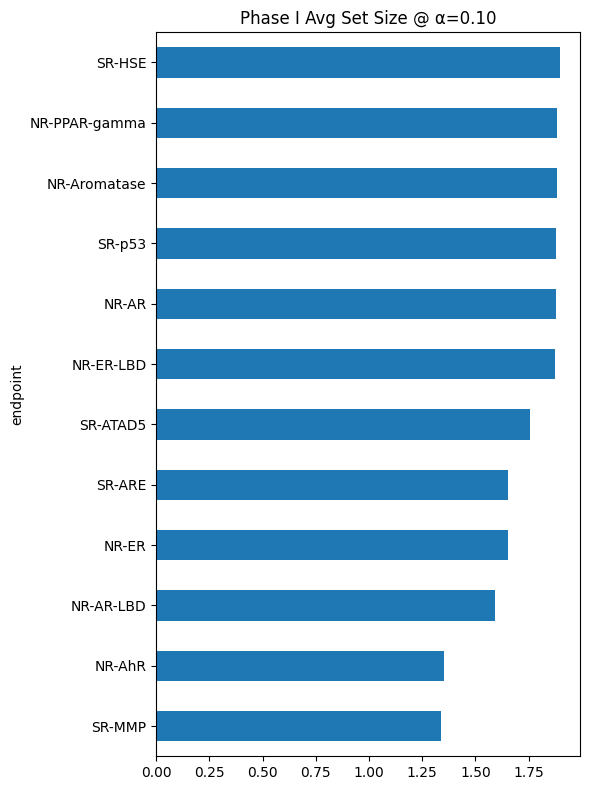

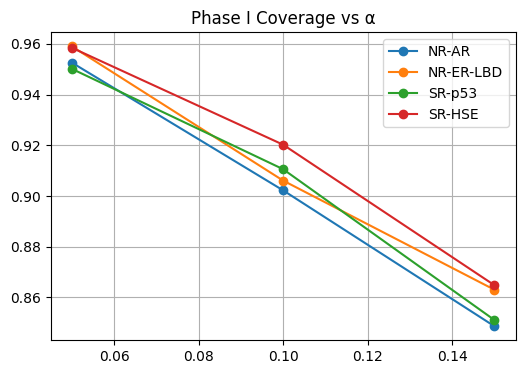

In [9]:
# Cell 4: Phase I Visualizations
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns

df1 = pd.read_csv('results/phase1_all_endpoints.csv')

# 1) Coverage heatmap
pivot_cov = df1.pivot_table(
    index='endpoint', columns='alpha', values='coverage', aggfunc='mean'
)
plt.figure(figsize=(8,10))
sns.heatmap(pivot_cov, annot=True, fmt=".3f", cmap="viridis")
plt.title('Phase I Coverage per Endpoint vs α'); plt.tight_layout(); plt.show()

# 2) Avg set size at α=0.10
sub = df1[df1.alpha==0.10].groupby('endpoint')['avg_set_size'].mean().sort_values()
plt.figure(figsize=(6,8))
sub.plot.barh(); plt.title('Phase I Avg Set Size @ α=0.10'); plt.tight_layout(); plt.show()

# 3) Coverage vs α (selected assays)
plt.figure(figsize=(6,4))
for ep in ['NR-AR','NR-ER-LBD','SR-p53','SR-HSE']:
    d = df1[df1.endpoint==ep].groupby('alpha')['coverage'].mean()
    plt.plot(d.index, d.values, marker='o', label=ep)
plt.title('Phase I Coverage vs α'); plt.legend(); plt.grid(True); plt.show()


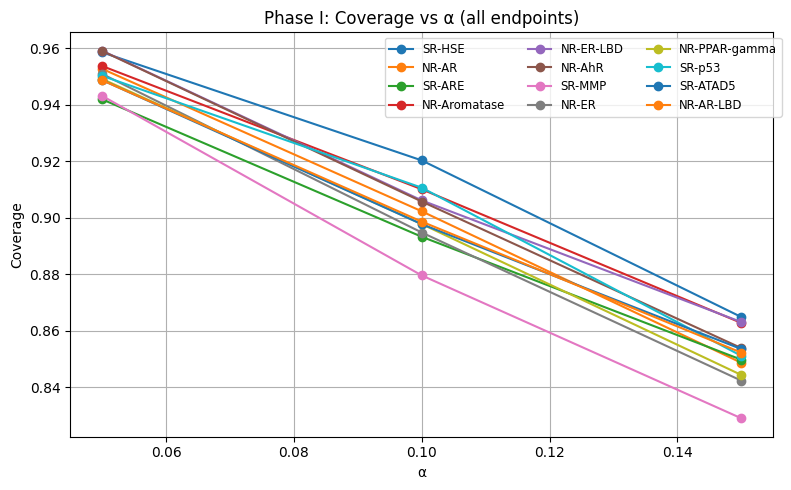

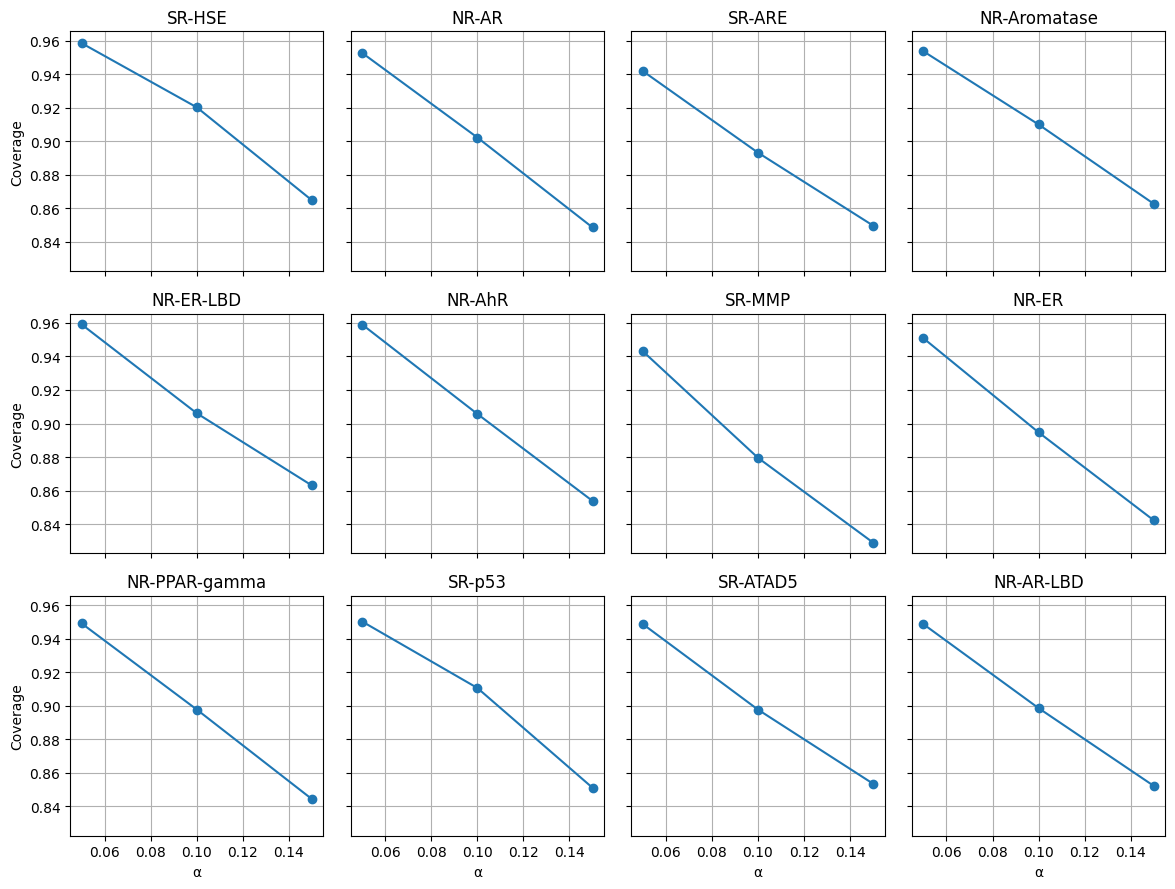

In [10]:
# Cell 4b: Phase I – Coverage vs α for all 12 endpoints

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('results/phase1_all_endpoints.csv')

# Option A: all lines on one plot (may get crowded)
plt.figure(figsize=(8,5))
for ep in df1['endpoint'].unique():
    d = df1[df1.endpoint==ep].groupby('alpha')['coverage'].mean().sort_index()
    plt.plot(d.index, d.values, marker='o', label=ep)
plt.title('Phase I: Coverage vs α (all endpoints)')
plt.xlabel('α'); plt.ylabel('Coverage')
plt.legend(ncol=3, fontsize='small', bbox_to_anchor=(1.02,1))
plt.grid(True); plt.tight_layout(); plt.show()

# Option B: small‐multiples (3×4 grid)
endpoints = df1['endpoint'].unique()
fig, axes = plt.subplots(3,4, figsize=(12,9), sharex=True, sharey=True)
for ax, ep in zip(axes.flatten(), endpoints):
    d = df1[df1.endpoint==ep].groupby('alpha')['coverage'].mean().sort_index()
    ax.plot(d.index, d.values, marker='o')
    ax.set_title(ep)
    ax.grid(True)
for ax in axes[-1]:
    ax.set_xlabel('α')
for ax in axes[:,0]:
    ax.set_ylabel('Coverage')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# 1) Network & loader (must match Phase I)
ARCHS = {'base': [2048, 512, 128, 2]}

class Net(nn.Module):
    def __init__(self, sz):
        super().__init__()
        layers = []
        for i in range(len(sz)-1):
            layers.append(nn.Linear(sz[i], sz[i+1]))
            if i < len(sz)-2:
                layers.append(nn.ReLU())
                layers.append(nn.Dropout(0.2))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

def get_loader(X, y, bs, shuf=False):
    return DataLoader(
        TensorDataset(
            torch.tensor(X, dtype=torch.float32),
            torch.tensor(y, dtype=torch.long)
        ),
        batch_size=bs,
        shuffle=shuf
    )

# 2) Load data & Phase I thresholds
data   = np.load('tox21_XY.npz')
X_all  = data['X']
y_all  = data['y']
labels = list(data['labels'])
th     = pd.read_csv('results/phase1_thresholds.csv')

# filter to most stringent α
th_strict = th[ th['alpha'] <= 0.05 ].reset_index(drop=True)

# Phase II function
def run_phase2(thresholds, agg_rule):
    pred_list = []
    for idx_row, row in thresholds.iterrows():
        ep, seed, arch, alpha, q0, q1 = (
            row['endpoint'], row['seed'], row['architecture'],
            row['alpha'], row['q0'], row['q1']
        )
        print(f"[{idx_row+1}/{len(thresholds)}] EP={ep}, seed={seed}, α={alpha:.2f}")

        # load model
        model = Net(ARCHS[arch])
        model.load_state_dict(torch.load(
            f"models/{ep}_seed{seed}_{arch}_phase1.pth"
        ))
        model.eval()

        # select compounds with assay
        ix      = labels.index(ep)
        mask    = ~np.isnan(y_all[:, ix])
        X_ep    = X_all[mask]
        y_ep    = y_all[mask, ix].astype(int)
        sample_idxs = np.where(mask)[0]

        # inference
        loader = get_loader(X_ep, y_ep, bs=len(y_ep), shuf=False)
        xb_t, yb_t = next(iter(loader))
        with torch.no_grad():
            probs = torch.softmax(model(xb_t), dim=1).numpy()
        true = yb_t.numpy()

        # conformal sets → crisp
        crisp = []
        for i, p in enumerate(probs):
            s = []
            if 1 - p[0] <= q0: s.append(0)
            if 1 - p[1] <= q1: s.append(1)
            if   1 in s and 0 not in s:  c=1
            elif 0 in s and 1 not in s: c=0
            else:                       c=-1
            crisp.append(c)

        # record
        for si, c in zip(sample_idxs, crisp):
            pred_list.append({'sample_idx':int(si),'endpoint':ep,'crisp':int(c)})

    # de-dup & pivot
    df = pd.DataFrame(pred_list)
    df = df.groupby(['sample_idx','endpoint'], as_index=False).agg({'crisp':'max'})
    wide = df.pivot(index='sample_idx', columns='endpoint', values='crisp').fillna(-1).astype(int)

    # aggregation
    if agg_rule == 'OR':
        wide['pred_any'] = wide.apply(lambda r: 1 if 1 in r.values else (0 if 0 in r.values else -1), axis=1)
    elif agg_rule == 'at_least_2':
        def rule2(r):
            if (r.values==1).sum() >= 2: return 1
            if (r.values==0).sum() >= 1: return 0
            return -1
        wide['pred_any'] = wide.apply(rule2, axis=1)
    else:
        raise ValueError("Unknown rule")

    wide['true_any'] = (np.nan_to_num(y_all, nan=0).sum(axis=1)>0).astype(int)
    mask = wide['pred_any']!=-1
    y_t = wide.loc[mask,'true_any']
    y_p = wide.loc[mask,'pred_any']

    acc = accuracy_score(y_t, y_p)
    cm  = confusion_matrix(y_t, y_p)
    prf = precision_recall_fscore_support(y_t, y_p, zero_division=0)
    return acc, cm, prf

# run and compare
print("=== Strict α≤0.05 & OR-rule ===")
acc1, cm1, prf1 = run_phase2(th_strict, 'OR')
print("Acc:",acc1, "\nCM:\n",cm1,"\nP/R/F1:",prf1)

print("\n=== Strict α≤0.05 & ≥2-assay rule ===")
acc2, cm2, prf2 = run_phase2(th_strict, 'at_least_2')
print("Acc:",acc2, "\nCM:\n",cm2,"\nP/R/F1:",prf2)


In [94]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# ── 0) match Phase I definitions ───────────────────────────────────────────────
ARCHS = {'base':[2048,512,128,2]}
SEEDS = [0,1,2]

class Net(nn.Module):
    def __init__(self, sz):
        super().__init__()
        layers = []
        for i in range(len(sz)-1):
            layers.append(nn.Linear(sz[i], sz[i+1]))
            if i < len(sz)-2:
                layers += [nn.ReLU(), nn.Dropout(0.2)]
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

def get_loader(X,y,bs,shuf=False):
    return DataLoader(
        TensorDataset(
            torch.tensor(X,dtype=torch.float32),
            torch.tensor(y,dtype=torch.long)
        ),
        batch_size=bs, shuffle=shuf
    )

# ── 1) load data & thresholds ─────────────────────────────────────────────────
data   = np.load('tox21_XY.npz')
X_all  = data['X']
y_all  = data['y']
labels = list(data['labels'])
th     = pd.read_csv('results/phase1_thresholds.csv')

# ── 2) build per‐seed “crisp” calls ────────────────────────────────────────────
pred_list = []
for idx, row in th.iterrows():
    ep, seed, arch, alpha, q0, q1 = (
        row['endpoint'], row['seed'], row['architecture'],
        row['alpha'], row['q0'], row['q1']
    )
    # load model for this (ep,seed,arch)
    m = Net(ARCHS[arch])
    m.load_state_dict(torch.load(f"models/{ep}_seed{seed}_{arch}_phase1.pth"))
    m.eval()

    # pick compounds assayed on this endpoint
    i_ep = labels.index(ep)
    mask = ~np.isnan(y_all[:,i_ep])
    X_ep = X_all[mask]
    y_ep = y_all[mask,i_ep].astype(int)
    ids  = np.where(mask)[0]

    # forward
    xb, yb = next(iter(get_loader(X_ep,y_ep,len(y_ep),False)))
    with torch.no_grad():
        probs = torch.softmax(m(xb),1).numpy()
    true = yb.numpy()

    # build conformal sets → crisp
    for i,p in enumerate(probs):
        s = []
        if 1 - p[0] <= q0: s.append(0)
        if 1 - p[1] <= q1: s.append(1)
        if   1 in s and 0 not in s:  c=1
        elif 0 in s and 1 not in s:  c=0
        else:                        c=-1
        pred_list.append({
            'sample_idx': int(ids[i]),
            'endpoint':   ep,
            'seed':       int(seed),
            'crisp':      int(c)
        })

# ── 3) consensus across seeds (cross-val) per endpoint ─────────────────────────
df = pd.DataFrame(pred_list)
print("before consensus:", df.shape)

# for each (sample,endpoint) take the majority across seeds
def seed_consensus(vals):
    # vals is list of crisp ∈ {-1,0,1} over seeds
    # count only non-ambiguous seeds:
    toxic = (vals==1).sum()
    nontox= (vals==0).sum()
    if toxic >= nontox and toxic>0:  return 1
    if nontox > toxic:               return 0
    return -1

cons = (
    df.groupby(['sample_idx','endpoint'])['crisp']
      .agg(lambda x: seed_consensus(x.values))
      .reset_index()
)
print("after consensus:", cons.shape)

# ── 4) pivot to wide form & OR‐rule across endpoints ─────────────────────────
wide = cons.pivot(index='sample_idx', columns='endpoint', values='crisp') \
           .fillna(-1).astype(int)

# OR‐rule: any endpoint says toxic → toxic
wide['pred_toxic_any'] = wide.apply(
    lambda r: 1 if 1 in r.values else (0 if 0 in r.values else -1),
    axis=1
)

# ── 5) evaluate ───────────────────────────────────────────────────────────────
true_any = (np.nan_to_num(y_all,nan=0).sum(axis=1)>0).astype(int)
wide['true_any'] = pd.Series(true_any, index=wide.index)

mask = wide['pred_toxic_any'] != -1
y_t, y_p = wide.loc[mask,'true_any'], wide.loc[mask,'pred_toxic_any']

print("Accuracy:", accuracy_score(y_t,y_p))
print("Confusion matrix:\n", confusion_matrix(y_t,y_p))
print("P/R/F1:\n", precision_recall_fscore_support(y_t,y_p, zero_division=0))

# ── 6) save ───────────────────────────────────────────────────────────────────
wide.to_csv('results/phase1_cv_consensus_preds.csv')
print("Saved → results/phase1_cv_consensus_preds.csv")


before consensus: (884781, 4)
after consensus: (98309, 3)
Accuracy: 0.5815150986210508
Confusion matrix:
 [[2985 4740]
 [  55 3678]]
P/R/F1:
 (array([0.98190789, 0.43692088]), array([0.38640777, 0.98526654]), array([0.55457501, 0.60538227]), array([7725, 3733]))
Saved → results/phase1_cv_consensus_preds.csv


In [95]:
# Cell 5 (fixed): Phase II – Single vs Multi-Task (all endpoints) with model + threshold saving

import os, numpy as np, pandas as pd, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# 1) Load data
data   = np.load('tox21_XY.npz')
X_all, y_all, labels = data['X'], data['y'], list(data['labels'])

# 2) Config
SEED    = 0
EPOCHS  = 10
BATCH   = 64
ALPHAS  = np.linspace(0.01, 0.2, 20)

# 3) Define models
class STNet(nn.Module):
    def __init__(self,d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,128), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,2)
        )
    def forward(self,x): return self.net(x)

class MTNet(nn.Module):
    def __init__(self,d,nt):
        super().__init__()
        self.shared = nn.Sequential(
            nn.Linear(d,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,256), nn.ReLU(), nn.Dropout(0.2)
        )
        self.heads = nn.ModuleList([nn.Linear(256,2) for _ in range(nt)])
    def forward(self,x):
        h = self.shared(x)
        return torch.stack([head(h) for head in self.heads], dim=1)

def mkloader(X,y,bs,shuf=True):
    return DataLoader(TensorDataset(
        torch.tensor(X,dtype=torch.float32),
        torch.tensor(y,dtype=torch.long)
    ), batch_size=bs, shuffle=shuf)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare output containers
records = []
thresholds_records = []

print("▶️ Starting Phase II (single vs multi-task) on all endpoints")

# prepare dirs
os.makedirs('models/st_phase2', exist_ok=True)
os.makedirs('models/mt_phase2', exist_ok=True)
os.makedirs('results',           exist_ok=True)

for ep in labels:
    tidx = labels.index(ep)
    mask = ~np.isnan(y_all[:,tidx])
    X_ep, Y_ep = X_all[mask], y_all[mask]
    y_ep       = Y_ep[:,tidx].astype(int)
    print(f"\n[Phase II] Endpoint = {ep}")

    # splits
    X_t,  X_test, Y_t,  Y_test  = train_test_split(
        X_ep, Y_ep, test_size=0.2, stratify=y_ep, random_state=SEED)
    y_t = Y_t[:,tidx].astype(int)
    X_tr, X_cal, Y_tr, Y_cal = train_test_split(
        X_t, Y_t, test_size=0.25, stratify=y_t, random_state=SEED)
    y_tr = Y_tr[:,tidx].astype(int)
    y_cal= Y_cal[:,tidx].astype(int)

    # loaders for ST
    tr_st = mkloader(X_tr,   y_tr, BATCH, True)
    ca_st = mkloader(X_cal,  y_cal, len(y_cal), False)
    te_st = mkloader(X_test, Y_test[:,tidx].astype(int), len(Y_test), False)

    # loaders for MT (fill nan→-1)
    Y_tr_i   = np.where(np.isnan(Y_tr),  -1, Y_tr).astype(int)
    Y_cal_i  = np.where(np.isnan(Y_cal), -1, Y_cal).astype(int)
    Y_test_i = np.where(np.isnan(Y_test),-1, Y_test).astype(int)
    tr_mt = mkloader(X_tr,   Y_tr_i, BATCH, True)
    ca_mt = mkloader(X_cal,  Y_cal_i, len(Y_cal_i), False)
    te_mt = mkloader(X_test, Y_test_i[:,tidx], len(Y_test), False)

    # — ST training & calibration
    print("  • Training single-task model")
    model_st = STNet(X_ep.shape[1]).to(device)
    opt_st   = optim.Adam(model_st.parameters(), lr=1e-3)
    loss_st  = nn.CrossEntropyLoss()
    model_st.train()
    for e in range(1, EPOCHS+1):
        for xb,yb in tr_st:
            xb,yb = xb.to(device), yb.to(device)
            opt_st.zero_grad()
            loss_st(model_st(xb), yb).backward()
            opt_st.step()
        print(f"    – ST epoch {e}/{EPOCHS}")

    st_path = f"models/st_phase2/{ep}_ST_phase2.pth"
    torch.save(model_st.state_dict(), st_path)
    print(f"    ✔ Saved ST model → {st_path}")

    model_st.eval()
    xb_c, yb_c = next(iter(ca_st))
    probs_c = torch.softmax(model_st(xb_c.to(device)), dim=1).detach().cpu().numpy()
    nc0 = 1 - probs_c[yb_c.numpy()==0, 0]
    nc1 = 1 - probs_c[yb_c.numpy()==1, 1]
    xb_t, yb_t = next(iter(te_st))
    probs_t_st = torch.softmax(model_st(xb_t.to(device)), dim=1).detach().cpu().numpy()
    true = yb_t.numpy()

    # — MT training & calibration
    print("  • Training multi-task model")
    model_mt = MTNet(X_ep.shape[1], len(labels)).to(device)
    opt_mt   = optim.Adam(model_mt.parameters(), lr=1e-3)
    loss_mt  = nn.CrossEntropyLoss(reduction='none', ignore_index=-1)
    model_mt.train()
    for e in range(1, EPOCHS+1):
        for xb,yb in tr_mt:
            xb,yb = xb.to(device), yb.to(device)
            logits = model_mt(xb)
            mask2  = (yb != -1)
            loss = 0
            for t in range(len(labels)):
                m = mask2[:,t]
                if m.any():
                    loss += loss_mt(logits[:,t], yb[:,t])[m].mean()
            opt_mt.zero_grad(); loss.backward(); opt_mt.step()
        print(f"    – MT epoch {e}/{EPOCHS}")

    mt_path = f"models/mt_phase2/{ep}_MT_phase2.pth"
    torch.save(model_mt.state_dict(), mt_path)
    print(f"    ✔ Saved MT model → {mt_path}")

    model_mt.eval()
    xb_c_mt, yb_c_mt = next(iter(ca_mt))
    # fix: extract endpoint-specific labels
    yb_c_arr = yb_c_mt.numpy()[:, tidx]
    probs_c_mt = torch.softmax(model_mt(xb_c_mt.to(device))[:,tidx], dim=1).detach().cpu().numpy()
    nc_mt = 1 - probs_c_mt[np.arange(len(yb_c_arr)), yb_c_arr]

    xb_t_mt, yb_t_mt = next(iter(te_mt))
    probs_t_mt = torch.softmax(model_mt(xb_t_mt.to(device))[:,tidx], dim=1).detach().cpu().numpy()

    # — conformal sweep & record thresholds
    for α in ALPHAS:
        q0, q1 = np.quantile(nc0, 1-α), np.quantile(nc1, 1-α)
        q_m    = np.quantile(nc_mt, 1-α)

        # record thresholds
        thresholds_records.append({'phase':'P2','endpoint':ep,'architecture':'ST','alpha':α,'q0':q0,'q1':q1})
        thresholds_records.append({'phase':'P2','endpoint':ep,'architecture':'MT','alpha':α,'q0':q_m,'q1':q_m})

        # coverage & size
        p_st = [[k for k in (0,1) if 1-probs_t_st[i,k] <= (q0 if k==0 else q1)] for i in range(len(true))]
        cov_s = np.mean([ true[i] in s for i,s in enumerate(p_st) ])
        sz_s  = np.mean([ len(s) for s in p_st ])
        p_mt = [[k for k in (0,1) if 1-probs_t_mt[i,k] <= q_m] for i in range(len(true))]
        cov_m = np.mean([ true[i] in s for i,s in enumerate(p_mt) ])
        sz_m  = np.mean([ len(s) for s in p_mt ])

        records.append({'phase':'P2','endpoint':ep,'alpha':α,'cov_single':cov_s,'size_single':sz_s,'cov_multi':cov_m,'size_multi':sz_m})
        print(f"    • α={α:.2f} → ST cov={cov_s:.3f}, MT cov={cov_m:.3f}")

# 4) Save results & thresholds
pd.DataFrame(records).to_csv('results/phase2_all_endpoints.csv', index=False)
pd.DataFrame(thresholds_records).to_csv('results/phase2_thresholds.csv', index=False)
print("\n✅ Phase II complete")


▶️ Starting Phase II (single vs multi-task) on all endpoints

[Phase II] Endpoint = SR-HSE
  • Training single-task model
    – ST epoch 1/10
    – ST epoch 2/10
    – ST epoch 3/10
    – ST epoch 4/10
    – ST epoch 5/10
    – ST epoch 6/10
    – ST epoch 7/10
    – ST epoch 8/10
    – ST epoch 9/10
    – ST epoch 10/10
    ✔ Saved ST model → models/st_phase2/SR-HSE_ST_phase2.pth
  • Training multi-task model
    – MT epoch 1/10
    – MT epoch 2/10
    – MT epoch 3/10
    – MT epoch 4/10
    – MT epoch 5/10
    – MT epoch 6/10
    – MT epoch 7/10
    – MT epoch 8/10
    – MT epoch 9/10
    – MT epoch 10/10
    ✔ Saved MT model → models/mt_phase2/SR-HSE_MT_phase2.pth
    • α=0.01 → ST cov=0.990, MT cov=0.990
    • α=0.02 → ST cov=0.987, MT cov=0.980
    • α=0.03 → ST cov=0.978, MT cov=0.973
    • α=0.04 → ST cov=0.963, MT cov=0.962
    • α=0.05 → ST cov=0.945, MT cov=0.955
    • α=0.06 → ST cov=0.934, MT cov=0.947
    • α=0.07 → ST cov=0.925, MT cov=0.939
    • α=0.08 → ST cov=0.912, M

In [96]:
# ── Inference Script for Phase II with Progress Prints ──────────────────────
import os
# force CPU-only (avoid NCCL errors)
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# ── 0) Re-define networks & loader ──────────────────────────────────────────
class STNet(nn.Module):
    def __init__(self, d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,128), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,2)
        )
    def forward(self,x): return self.net(x)

class MTNet(nn.Module):
    def __init__(self,d,nt):
        super().__init__()
        self.shared = nn.Sequential(
            nn.Linear(d,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,256), nn.ReLU(), nn.Dropout(0.2)
        )
        self.heads = nn.ModuleList([nn.Linear(256,2) for _ in range(nt)])
    def forward(self,x):
        h = self.shared(x)
        return torch.stack([head(h) for head in self.heads], dim=1)

def mkloader(X, y, bs, shuffle=False):
    return DataLoader(
        TensorDataset(
            torch.tensor(X, dtype=torch.float32),
            torch.tensor(y, dtype=torch.long)
        ),
        batch_size=bs, shuffle=shuffle
    )

# ── 1) Load data & thresholds ───────────────────────────────────────────────
print("Loading data and thresholds...")
data    = np.load('tox21_XY.npz')
X_all   = data['X'];  y_all = data['y'];  labels = list(data['labels'])
th2     = pd.read_csv('results/phase2_thresholds.csv')
print(f"  → {X_all.shape[0]} compounds, {X_all.shape[1]} features")
print(f"  → {len(th2)} threshold rows")

# ── 2) Build endpoint-level crisp calls ──────────────────────────────────────
pred_records = []
print("Starting per-row inference of conformal crisp calls...")
for i, row in th2.iterrows():
    ep, arch, α = row['endpoint'], row['architecture'], row['alpha']
    q0, q1      = row['q0'], row['q1']
    print(f"[{i+1}/{len(th2)}] EP={ep:<8} ARCH={arch:<2} α={α:.2f}", end=" ... ")

    # load model
    if arch=='ST':
        m = STNet(X_all.shape[1])
        path = f"models/st_phase2/{ep}_ST_phase2.pth"
    else:
        m = MTNet(X_all.shape[1], len(labels))
        path = f"models/mt_phase2/{ep}_MT_phase2.pth"
    m.load_state_dict(torch.load(path, map_location='cpu'))
    m.eval()

    # select compounds with assay
    tidx = labels.index(ep)
    mask = ~np.isnan(y_all[:,tidx])
    X_ep, y_ep = X_all[mask], y_all[mask,tidx].astype(int)
    ids = np.where(mask)[0]

    # forward-pass
    xb,yb = next(iter(mkloader(X_ep, y_ep, bs=len(y_ep), shuffle=False)))
    with torch.no_grad():
        logits = m(xb)
        if arch!='ST':
            logits = logits[:,tidx]
        probs = torch.softmax(logits, 1).numpy()
    true = yb.numpy()

    # crisp sets
    for j,p in enumerate(probs):
        s=[] 
        if 1-p[0] <= q0: s.append(0)
        if 1-p[1] <= q1: s.append(1)
        if   1 in s and 0 not in s:  c=1
        elif 0 in s and 1 not in s:  c=0
        else:                        c=-1
        pred_records.append({
            'sample_idx':int(ids[j]), 'endpoint':ep,
            'architecture':arch, 'alpha':α, 'crisp':c
        })
    print("done")

print("Finished per-row inference; total records =", len(pred_records))

# ── 3) Pivot & OR-rule per architecture ──────────────────────────────────────
df = pd.DataFrame(pred_records)
for arch in ['ST','MT']:
    print(f"Processing architecture {arch} pivot & OR-rule...")
    df_arch = df[df['architecture']==arch]
    wide = df_arch.pivot_table(
        index='sample_idx', columns='endpoint',
        values='crisp', aggfunc='max', fill_value=-1
    ).astype(int)
    print(f"  → wide shape: {wide.shape}")
    wide[f'pred_any_{arch}'] = wide.apply(
        lambda r: 1 if 1 in r.values else (0 if 0 in r.values else -1),
        axis=1
    )
    df_arch_wide = wide.copy()

    # ── 4) Evaluate ───────────────────────────────────────────────────────────
    print(f"Evaluating {arch} OR-rule:")
    true_any = (np.nan_to_num(y_all, nan=0).sum(axis=1)>0).astype(int)
    df_arch_wide['true_any'] = pd.Series(true_any, index=wide.index)
    mask = df_arch_wide[f'pred_any_{arch}'] != -1
    print("  Samples evaluated:", mask.sum())
    y_t = df_arch_wide.loc[mask,'true_any']
    y_p = df_arch_wide.loc[mask,f'pred_any_{arch}']
    print("  Accuracy:", accuracy_score(y_t,y_p))
    print("  Confusion matrix:\n", confusion_matrix(y_t,y_p))
    print("  P/R/F1:\n", precision_recall_fscore_support(y_t,y_p, zero_division=0))

    # ── 5) Save ───────────────────────────────────────────────────────────────
    out_path = f"results/phase2_{arch}_compound_preds.csv"
    df_arch_wide.to_csv(out_path)
    print("  Saved →", out_path)

print("✅ Phase-II inference complete.")


Loading data and thresholds...
  → 11759 compounds, 2048 features
  → 480 threshold rows
Starting per-row inference of conformal crisp calls...
[1/480] EP=SR-HSE   ARCH=ST α=0.01 ... done
[2/480] EP=SR-HSE   ARCH=MT α=0.01 ... done
[3/480] EP=SR-HSE   ARCH=ST α=0.02 ... done
[4/480] EP=SR-HSE   ARCH=MT α=0.02 ... done
[5/480] EP=SR-HSE   ARCH=ST α=0.03 ... done
[6/480] EP=SR-HSE   ARCH=MT α=0.03 ... done
[7/480] EP=SR-HSE   ARCH=ST α=0.04 ... done
[8/480] EP=SR-HSE   ARCH=MT α=0.04 ... done
[9/480] EP=SR-HSE   ARCH=ST α=0.05 ... done
[10/480] EP=SR-HSE   ARCH=MT α=0.05 ... done
[11/480] EP=SR-HSE   ARCH=ST α=0.06 ... done
[12/480] EP=SR-HSE   ARCH=MT α=0.06 ... done
[13/480] EP=SR-HSE   ARCH=ST α=0.07 ... done
[14/480] EP=SR-HSE   ARCH=MT α=0.07 ... done
[15/480] EP=SR-HSE   ARCH=ST α=0.08 ... done
[16/480] EP=SR-HSE   ARCH=MT α=0.08 ... done
[17/480] EP=SR-HSE   ARCH=ST α=0.09 ... done
[18/480] EP=SR-HSE   ARCH=MT α=0.09 ... done
[19/480] EP=SR-HSE   ARCH=ST α=0.10 ... done
[20/480] E

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


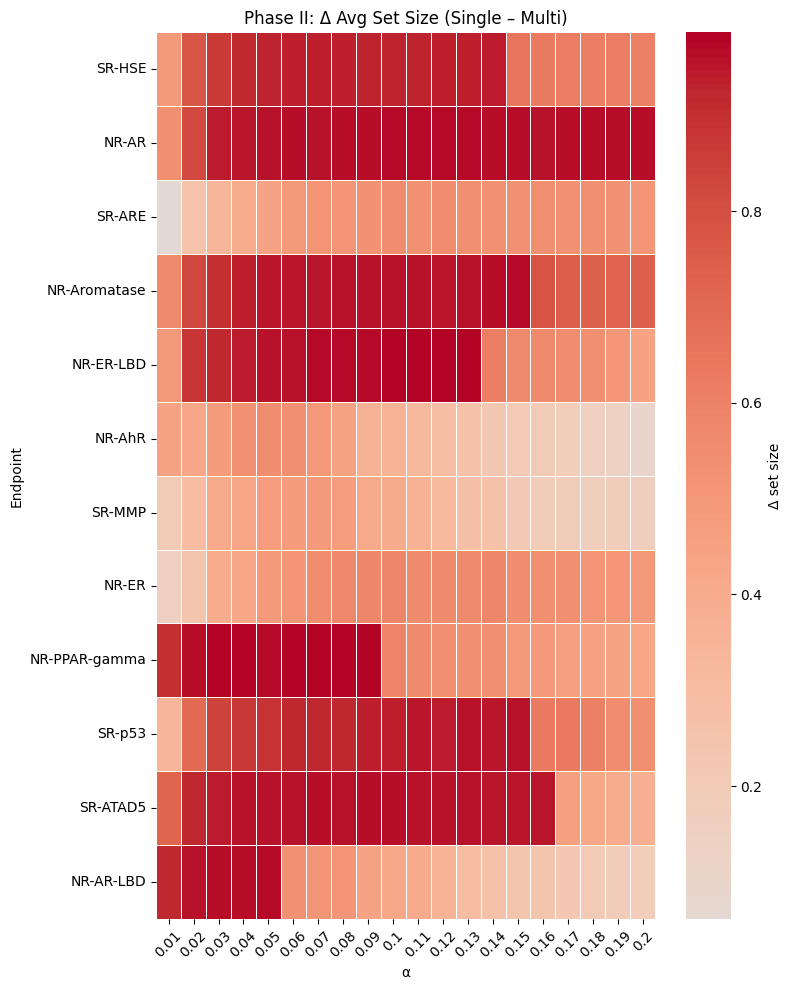

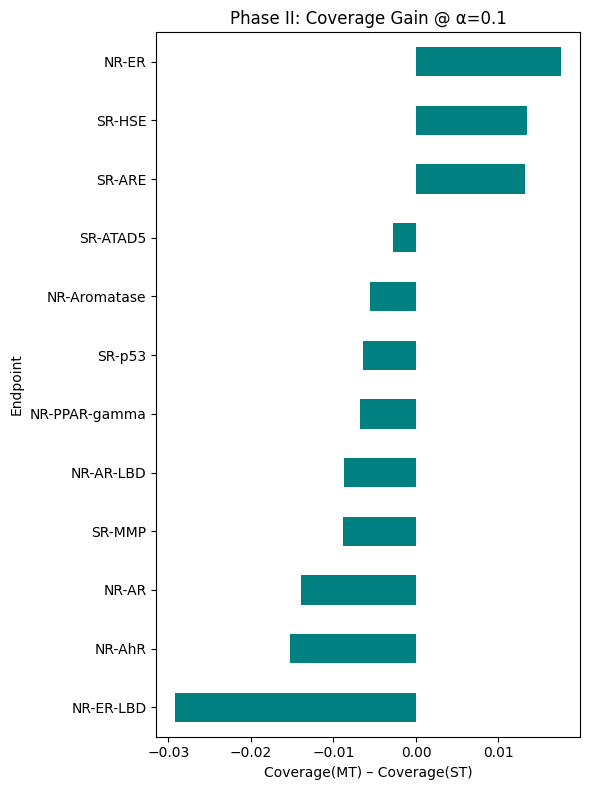

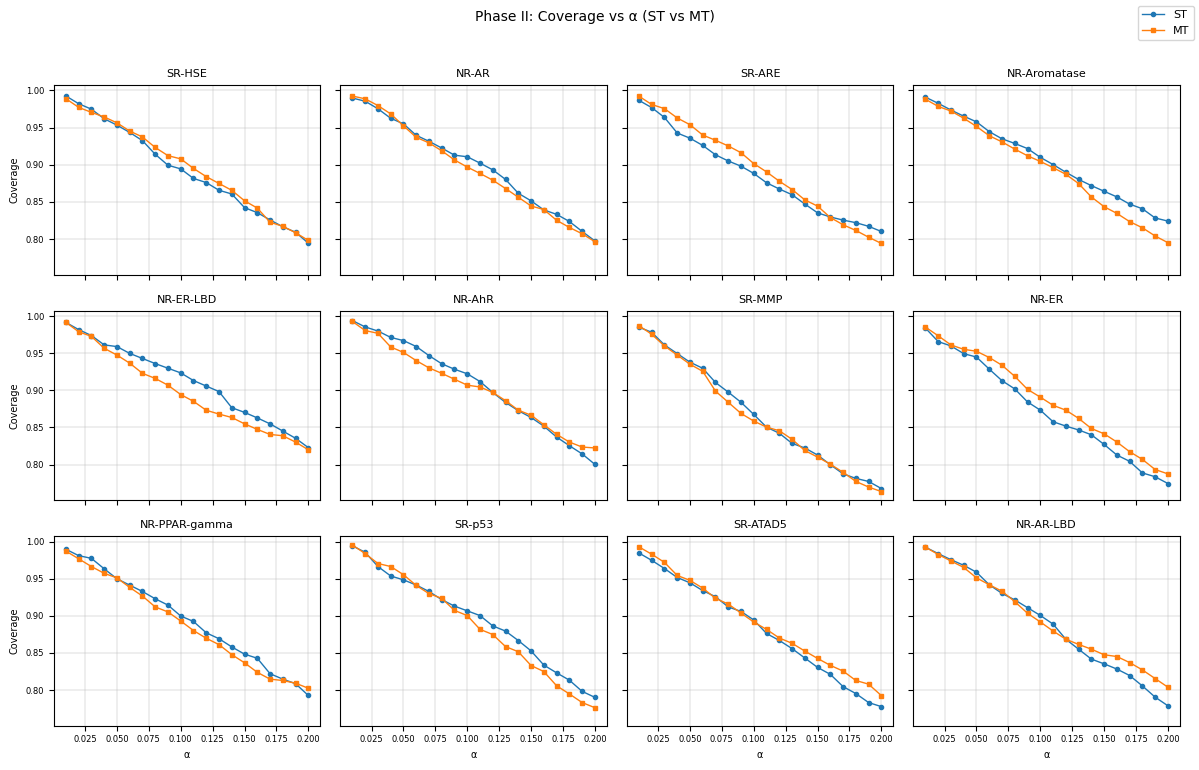

In [8]:
# Refined Phase II small-multiples (Coverage vs α for each endpoint)
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# load & prep
df2 = pd.read_csv('results/phase2_all_endpoints.csv')
df2['alpha_rnd']  = df2['alpha'].round(2)
df2['delta_size'] = df2['size_single'] - df2['size_multi']
df2['delta_cov']  = df2['cov_multi'] - df2['cov_single']
endpoints = df2['endpoint'].unique()
alphas    = sorted(df2['alpha_rnd'].unique())

# 1) Heatmap Δ set size
plt.figure(figsize=(8,10))
pivot_ds = df2.pivot_table(index='endpoint', columns='alpha_rnd', values='delta_size', aggfunc='mean').loc[endpoints, alphas]
sns.heatmap(pivot_ds, cmap='coolwarm', center=0, cbar_kws={'label':'Δ set size'}, linewidths=0.5)
plt.xticks(rotation=45); plt.title('Phase II: Δ Avg Set Size (Single – Multi)')
plt.xlabel('α'); plt.ylabel('Endpoint'); plt.tight_layout(); plt.show()

# 2) Bar Δ coverage @ α=0.10
alpha0 = 0.10
sub = df2[np.isclose(df2['alpha_rnd'], alpha0)].set_index('endpoint').loc[endpoints]
plt.figure(figsize=(6,8))
sub['delta_cov'].sort_values().plot.barh(color='teal')
plt.title(f'Phase II: Coverage Gain @ α={alpha0}')
plt.xlabel('Coverage(MT) – Coverage(ST)'); plt.ylabel('Endpoint'); plt.tight_layout(); plt.show()

# 3) Small-multiples grid
cols = 4
rows = int(np.ceil(len(endpoints)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*2.5), sharex=True, sharey=True)

for idx, ep in enumerate(endpoints):
    r, c = divmod(idx, cols)
    ax = axes[r, c]
    d = df2[df2.endpoint==ep].sort_values('alpha')
    ax.plot(d['alpha'], d['cov_single'], '-o', label='ST', linewidth=1, markersize=3)
    ax.plot(d['alpha'], d['cov_multi'], '-s', label='MT', linewidth=1, markersize=3)
    ax.set_title(ep, fontsize=8)
    ax.grid(True, linewidth=0.3)
    if r == rows-1:
        ax.set_xlabel('α', fontsize=7)
    if c == 0:
        ax.set_ylabel('Coverage', fontsize=7)
    ax.tick_params(labelsize=6)

# remove any empty subplots
for empty_idx in range(len(endpoints), rows*cols):
    r, c = divmod(empty_idx, cols)
    fig.delaxes(axes[r, c])

# shared legend
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=8)
plt.suptitle('Phase II: Coverage vs α (ST vs MT)', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()


In [97]:
# Cell 7 (augmented): Phase III – MC-Dropout conformal, model + threshold saving

import os, numpy as np, pandas as pd, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# 1) Prepare directories
os.makedirs('results', exist_ok=True)
os.makedirs('models/phase3', exist_ok=True)

# 2) Load data
data       = np.load('tox21_XY.npz')
X_all, y_all, labels = data['X'], data['y'], list(data['labels'])

# 3) Configuration
SEED, EPOCHS, BATCH = 0, 10, 64
T, LAM             = 50, 0.1
ALPHAS            = np.linspace(0.01, 0.2, 20)
DEVICE            = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 4) Network definition
class FPNet(nn.Module):
    def __init__(self,d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,128), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,2)
        )
    def forward(self,x): return self.net(x)

def mkloader(X,y,bs):
    return DataLoader(TensorDataset(
        torch.tensor(X,dtype=torch.float32),
        torch.tensor(y,dtype=torch.long)
    ), batch_size=bs, shuffle=True)

def qthr(nc,alpha):
    n = len(nc)
    k = min(int(np.ceil((n+1)*(1-alpha))), n)
    return np.sort(nc)[k-1]

# containers for results & thresholds
records = []
thresholds_records = []

print("▶️ Starting Phase III MC-Dropout conformal with model + threshold saving")

for ep in labels:
    tidx = labels.index(ep)
    mask = ~np.isnan(y_all[:,tidx])
    X_ep = X_all[mask]
    y_ep = y_all[mask,tidx].astype(int)
    print(f"\n[Phase III] Endpoint = {ep}")

    # train/calib/test split
    X_t, X_test, y_t, y_test = train_test_split(
        X_ep, y_ep, test_size=0.2, stratify=y_ep, random_state=SEED
    )
    X_tr, X_cal, y_tr, y_cal = train_test_split(
        X_t, y_t, test_size=0.25, stratify=y_t, random_state=SEED
    )

    # loaders
    tr_loader = mkloader(X_tr,   y_tr,   BATCH)
    ca_loader = mkloader(X_cal,  y_cal,  len(y_cal))
    te_loader = mkloader(X_test, y_test, len(y_test))

    # initialize & train
    model = FPNet(X_ep.shape[1]).to(DEVICE)
    opt   = optim.Adam(model.parameters(), lr=1e-3)
    lossf = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(1, EPOCHS+1):
        for xb, yb in tr_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad()
            lossf(model(xb), yb).backward()
            opt.step()
        print(f"    • Trained epoch {epoch}/{EPOCHS}")

    # save model
    model_fp = f"models/phase3/{ep}_phase3.pth"
    torch.save(model.state_dict(), model_fp)
    print(f"    ✔ Saved model to {model_fp}")

    # MC-Dropout inference helper
    def mc_probs(loader):
        model.train()
        all_means, all_vars = [], []
        for xb, _ in loader:
            xb = xb.to(DEVICE)
            with torch.no_grad():
                ps = [torch.softmax(model(xb),1).cpu().numpy() for _ in range(T)]
            arr = np.stack(ps,0)      # [T, batch, 2]
            all_means.append(arr.mean(0))
            all_vars.append(arr.var(0))
        return np.concatenate(all_means,0), np.concatenate(all_vars,0)

    # calibration non-conformity
    model.eval()
    mean_c, var_c = mc_probs(ca_loader)
    nc0 = (1 - mean_c[y_cal==0,0]) + LAM * var_c[y_cal==0,0]
    nc1 = (1 - mean_c[y_cal==1,1]) + LAM * var_c[y_cal==1,1]

    # test MC stats
    mean_t, var_t = mc_probs(te_loader)

    # conformal sweep + record thresholds
    for alpha in ALPHAS:
        q0, q1 = qthr(nc0, alpha), qthr(nc1, alpha)
        thresholds_records.append({
            'endpoint': ep, 'alpha':alpha, 'q0':q0, 'q1':q1
        })

        # compute coverage & set size
        pred_sets = []
        for i in range(len(y_test)):
            s = []
            for cls,(m,v) in enumerate(zip(mean_t[i], var_t[i])):
                if (1-m) + LAM*v <= (q0 if cls==0 else q1):
                    s.append(cls)
            pred_sets.append(s)
        cov = np.mean([y_test[i] in s for i,s in enumerate(pred_sets)])
        sz  = np.mean([len(s) for s in pred_sets])
        records.append({
            'phase':'P3','endpoint':ep,'alpha':alpha,
            'coverage':cov,'avg_set_size':sz
        })
        print(f"    • α={alpha:.2f} → cov={cov:.3f}, size={sz:.3f}")

# save results & thresholds
pd.DataFrame(records).to_csv('results/phase3_all_endpoints.csv', index=False)
pd.DataFrame(thresholds_records).to_csv('results/phase3_thresholds.csv', index=False)
print("\n✅ Phase III complete")
print("  • results/phase3_all_endpoints.csv")
print("  • results/phase3_thresholds.csv")


▶️ Starting Phase III MC-Dropout conformal with model + threshold saving

[Phase III] Endpoint = SR-HSE
    • Trained epoch 1/10
    • Trained epoch 2/10
    • Trained epoch 3/10
    • Trained epoch 4/10
    • Trained epoch 5/10
    • Trained epoch 6/10
    • Trained epoch 7/10
    • Trained epoch 8/10
    • Trained epoch 9/10
    • Trained epoch 10/10
    ✔ Saved model to models/phase3/SR-HSE_phase3.pth
    • α=0.01 → cov=0.993, size=1.992
    • α=0.02 → cov=0.982, size=1.980
    • α=0.03 → cov=0.975, size=1.972
    • α=0.04 → cov=0.965, size=1.963
    • α=0.05 → cov=0.961, size=1.958
    • α=0.06 → cov=0.943, size=1.940
    • α=0.07 → cov=0.931, size=1.925
    • α=0.08 → cov=0.920, size=1.913
    • α=0.09 → cov=0.909, size=1.902
    • α=0.10 → cov=0.899, size=1.891
    • α=0.11 → cov=0.893, size=1.885
    • α=0.12 → cov=0.881, size=1.871
    • α=0.13 → cov=0.876, size=1.866
    • α=0.14 → cov=0.866, size=1.856
    • α=0.15 → cov=0.850, size=1.656
    • α=0.16 → cov=0.838, size=1.644


In [98]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import KFold

# ── 0) Definitions ─────────────────────────────────────────────────────────
class FPNet(nn.Module):
    def __init__(self,d):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(d,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,128), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,2)
        )
    def forward(self,x): return self.net(x)

def mkloader(X, bs):
    return DataLoader(torch.tensor(X,dtype=torch.float32), batch_size=bs, shuffle=False)

def qthr(nc,alpha):
    n = len(nc)
    k = min(int(np.ceil((n+1)*(1-alpha))), n)
    return np.sort(nc)[k-1]

# ── 1) Load data & thresholds ───────────────────────────────────────────────
print("Loading data and thresholds...")
data    = np.load('tox21_XY.npz')
X_all   = data['X']
y_all   = data['y']
labels  = list(data['labels'])
th3     = pd.read_csv('results/phase3_thresholds.csv')
print(f"{X_all.shape[0]} compounds, {X_all.shape[1]} features")
print(f"{len(th3)} threshold rows")

# ── 2) Set up cross-val ──────────────────────────────────────────────────────
kf = KFold(n_splits=3, shuffle=True, random_state=0)

# ── 3) Collect crisp calls per fold ─────────────────────────────────────────
fold_preds = []
for fold, (_, test_idx) in enumerate(kf.split(X_all), 1):
    print(f"\n=== Fold {fold}/3 ===")
    for i, row in th3.iterrows():
        ep, alpha, q0, q1 = row['endpoint'], row['alpha'], row['q0'], row['q1']
        print(f"[Fold {fold}] EP={ep} α={alpha:.2f}", end=" ... ")
        # load model
        model = FPNet(X_all.shape[1])
        model.load_state_dict(torch.load(f"models/phase3/{ep}_phase3.pth", map_location='cpu'))
        model.eval()
        # select test compounds for this endpoint
        tidx = labels.index(ep)
        mask = ~np.isnan(y_all[:,tidx])
        mask_idx = test_idx[np.isin(test_idx, np.where(mask)[0])]
        X_test = X_all[mask_idx]
        y_test = y_all[mask_idx, tidx].astype(int)
        # MC-Dropout: use T=50 kept dropout at inference
        T = 50; LAM=0.1
        # run T stochastic passes
        probs_all = []
        for t in range(T):
            model.train()
            with torch.no_grad():
                logits = model(torch.tensor(X_test, dtype=torch.float32))
                probs_all.append(torch.softmax(logits,1).numpy())
        arr = np.stack(probs_all,0)
        mean_t = arr.mean(0)
        var_t  = arr.var(0)
        # build crisp
        for idx_i, samp in enumerate(mask_idx):
            m = mean_t[idx_i]; v=var_t[idx_i]
            s=[]
            if (1-m[0])+LAM*v[0] <= q0: s.append(0)
            if (1-m[1])+LAM*v[1] <= q1: s.append(1)
            if 1 in s and 0 not in s:  c=1
            elif 0 in s and 1 not in s: c=0
            else:                        c=-1
            fold_preds.append({
                'sample_idx': int(samp),
                'endpoint':   ep,
                'alpha':      alpha,
                'fold':       fold,
                'crisp':      c
            })
        print("done")

# ── 4) Consensus across folds ─────────────────────────────────────────────────
print("\nBuilding consensus across folds...")
dfp = pd.DataFrame(fold_preds)
def fold_consensus(vals):
    toxic = (vals==1).sum()
    nontox= (vals==0).sum()
    return 1 if toxic>nontox else (0 if nontox>toxic else -1)

cons = (
    dfp.groupby(['sample_idx','endpoint','alpha'])['crisp']
       .agg(lambda x: fold_consensus(x.values))
       .reset_index()
)
print("Consensus rows:", cons.shape[0])

# ── 5) Pivot & OR-rule across endpoints ──────────────────────────────────────
wide = cons.pivot_table(
    index='sample_idx', columns='endpoint', values='crisp', fill_value=-1
).astype(int)
wide['pred_toxic_any'] = wide.apply(lambda r: 1 if 1 in r.values else (0 if 0 in r.values else -1), axis=1)

# ── 6) Evaluate ───────────────────────────────────────────────────────────────
true_any = (np.nan_to_num(y_all, nan=0).sum(axis=1)>0).astype(int)
wide['true_any'] = pd.Series(true_any, index=wide.index)
mask = wide['pred_toxic_any']!=-1
print("\nEvaluation on consensus predictions:")
print("Samples:", mask.sum())
print("Accuracy:", accuracy_score(wide.loc[mask,'true_any'], wide.loc[mask,'pred_toxic_any']))
print("Confusion:\n", confusion_matrix(wide.loc[mask,'true_any'], wide.loc[mask,'pred_toxic_any']))
print("P/R/F1:\n", precision_recall_fscore_support(wide.loc[mask,'true_any'], wide.loc[mask,'pred_toxic_any'], zero_division=0))

# ── 7) Save ───────────────────────────────────────────────────────────────────
out = 'results/phase3_cv_consensus_preds.csv'
wide.to_csv(out)
print("Saved consensus predictions to", out)


Loading data and thresholds...
11759 compounds, 2048 features
240 threshold rows

=== Fold 1/3 ===
[Fold 1] EP=SR-HSE α=0.01 ... done
[Fold 1] EP=SR-HSE α=0.02 ... done
[Fold 1] EP=SR-HSE α=0.03 ... done
[Fold 1] EP=SR-HSE α=0.04 ... done
[Fold 1] EP=SR-HSE α=0.05 ... done
[Fold 1] EP=SR-HSE α=0.06 ... done
[Fold 1] EP=SR-HSE α=0.07 ... done
[Fold 1] EP=SR-HSE α=0.08 ... done
[Fold 1] EP=SR-HSE α=0.09 ... done
[Fold 1] EP=SR-HSE α=0.10 ... done
[Fold 1] EP=SR-HSE α=0.11 ... done
[Fold 1] EP=SR-HSE α=0.12 ... done
[Fold 1] EP=SR-HSE α=0.13 ... done
[Fold 1] EP=SR-HSE α=0.14 ... done
[Fold 1] EP=SR-HSE α=0.15 ... done
[Fold 1] EP=SR-HSE α=0.16 ... done
[Fold 1] EP=SR-HSE α=0.17 ... done
[Fold 1] EP=SR-HSE α=0.18 ... done
[Fold 1] EP=SR-HSE α=0.19 ... done
[Fold 1] EP=SR-HSE α=0.20 ... done
[Fold 1] EP=NR-AR α=0.01 ... done
[Fold 1] EP=NR-AR α=0.02 ... done
[Fold 1] EP=NR-AR α=0.03 ... done
[Fold 1] EP=NR-AR α=0.04 ... done
[Fold 1] EP=NR-AR α=0.05 ... done
[Fold 1] EP=NR-AR α=0.06 ... do

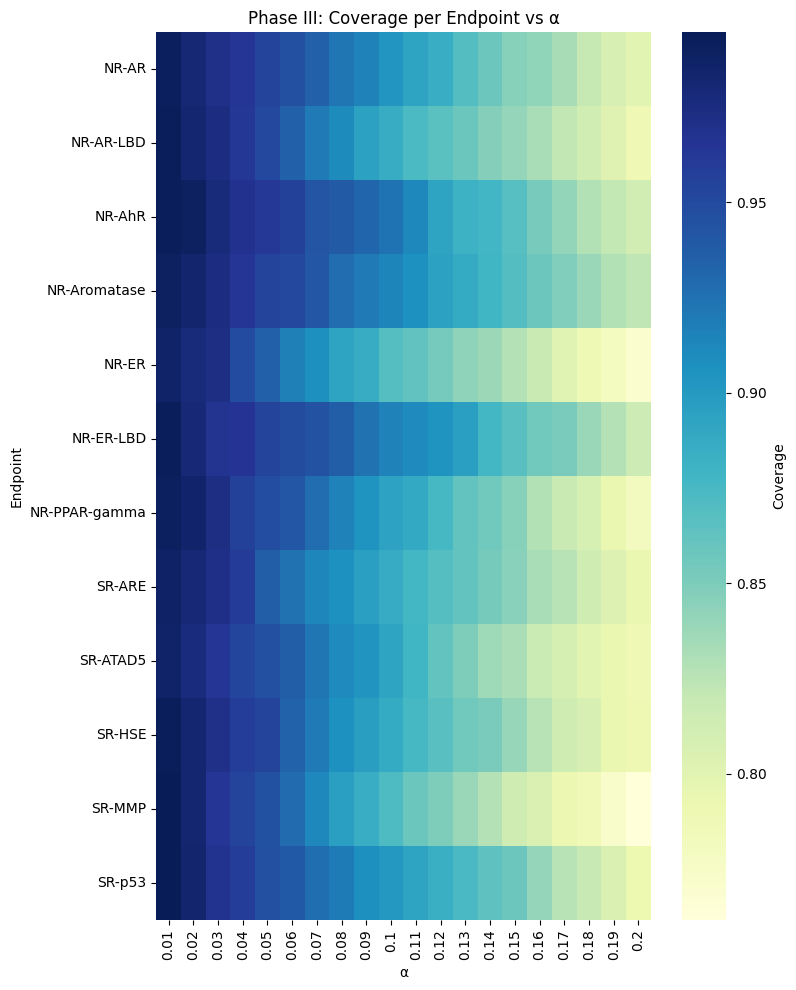

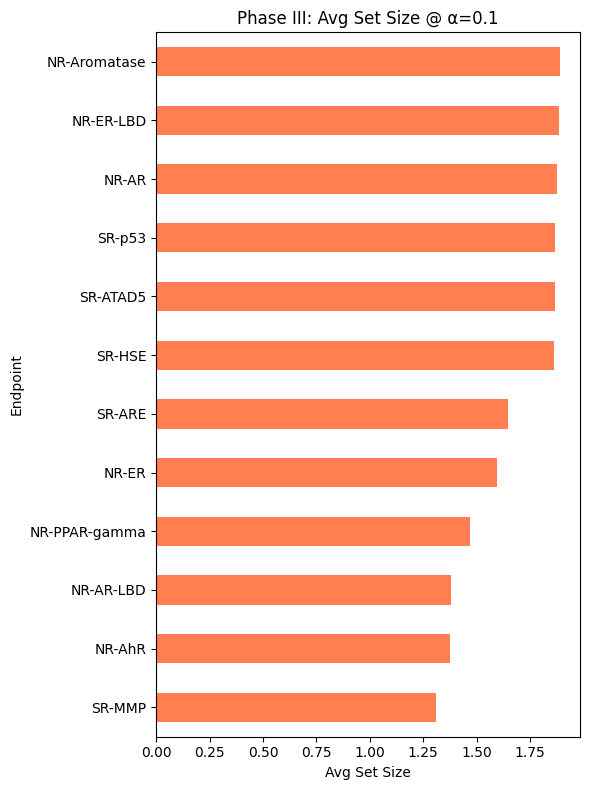

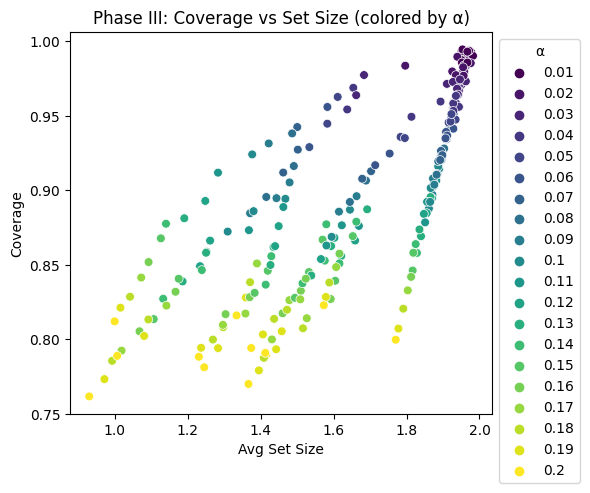

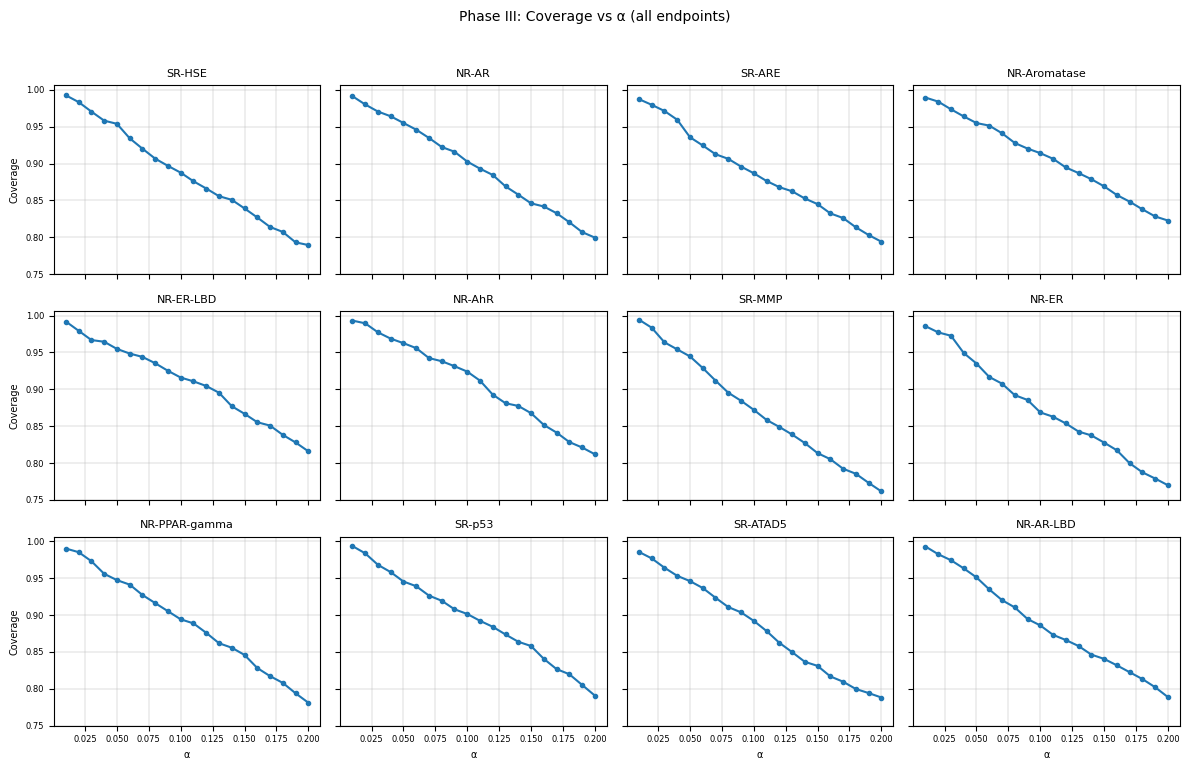

In [13]:
# Phase III: Four alternative visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Load results
df3 = pd.read_csv('results/phase3_all_endpoints.csv')
df3['alpha_rnd'] = df3['alpha'].round(2)

# A) Heatmap of Coverage vs Endpoint & α
pivot_cov = df3.pivot(index='endpoint', columns='alpha_rnd', values='coverage')
plt.figure(figsize=(8,10))
sns.heatmap(pivot_cov, annot=False, cmap='YlGnBu', cbar_kws={'label':'Coverage'})
plt.title('Phase III: Coverage per Endpoint vs α')
plt.xlabel('α'); plt.ylabel('Endpoint')
plt.tight_layout()
plt.show()

# B) Bar‐chart: Avg Set Size at α = 0.10
alpha0 = 0.10
sub = df3[np.isclose(df3['alpha_rnd'], alpha0)].set_index('endpoint')
plt.figure(figsize=(6,8))
sub['avg_set_size'].sort_values().plot.barh(color='coral')
plt.title(f'Phase III: Avg Set Size @ α={alpha0}')
plt.xlabel('Avg Set Size'); plt.ylabel('Endpoint')
plt.tight_layout()
plt.show()

# C) Scatter: Coverage vs Avg Set Size, colored by α
plt.figure(figsize=(6,5))
sns.scatterplot(
    data=df3, x='avg_set_size', y='coverage', hue='alpha_rnd',
    palette='viridis', legend='full', s=40
)
plt.title('Phase III: Coverage vs Set Size (colored by α)')
plt.xlabel('Avg Set Size'); plt.ylabel('Coverage')
plt.legend(title='α', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# D) Small-multiples: Coverage vs α for all endpoints
endpoints = df3['endpoint'].unique()
cols = 4
rows = int(np.ceil(len(endpoints)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*2.5), sharex=True, sharey=True)
for idx, ep in enumerate(endpoints):
    r, c = divmod(idx, cols)
    ax = axes[r, c]
    d = df3[df3.endpoint==ep].sort_values('alpha')
    ax.plot(d['alpha'], d['coverage'], '-o', markersize=3)
    ax.set_title(ep, fontsize=8)
    ax.grid(True, linewidth=0.3)
    if r==rows-1: ax.set_xlabel('α', fontsize=7)
    if c==0:      ax.set_ylabel('Coverage', fontsize=7)
    ax.tick_params(labelsize=6)
for empty in range(len(endpoints), rows*cols):
    r, c = divmod(empty, cols)
    fig.delaxes(axes[r,c])
plt.suptitle('Phase III: Coverage vs α (all endpoints)', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np

# load all three phases
p1 = pd.read_csv('results/phase1_all_endpoints.csv')
p2 = pd.read_csv('results/phase2_all_endpoints.csv')
p3 = pd.read_csv('results/phase3_all_endpoints.csv')

# focus on alpha = 0.10
alpha0 = 0.10
p1a = p1[np.isclose(p1['alpha'], alpha0)]
p2a = p2[np.isclose(p2['alpha'], alpha0)]
p3a = p3[np.isclose(p3['alpha'], alpha0)]

# aggregate mean ± std across endpoints
def summarize(df, cov_col, size_col):
    return {
        'mean_cov': df[cov_col].mean(),
        'std_cov':  df[cov_col].std(),
        'mean_size':df[size_col].mean(),
        'std_size': df[size_col].std()
    }

s1 = summarize(p1a, 'coverage', 'avg_set_size')
s2 = summarize(p2a, 'cov_multi', 'size_multi')
s3 = summarize(p3a, 'coverage', 'avg_set_size')

cmp = pd.DataFrame({
    'Phase': ['I (base NN)', 'II (multi-task)', 'III (MC-Dropout)'],
    'Coverage mean': [s1['mean_cov'], s2['mean_cov'], s3['mean_cov']],
    'Coverage std':  [s1['std_cov'],  s2['std_cov'],  s3['std_cov']],
    'SetSize mean':  [s1['mean_size'],s2['mean_size'],s3['mean_size']],
    'SetSize std':   [s1['std_size'], s2['std_size'], s3['std_size']],
})
print("Comparison at α = 0.10:\n")
print(cmp.to_string(index=False))


Comparison at α = 0.10:

           Phase  Coverage mean  Coverage std  SetSize mean  SetSize std
     I (base NN)       0.900815      0.013405      1.712493     0.215134
 II (multi-task)       0.898210      0.009038      0.955700     0.062683
III (MC-Dropout)       0.895346      0.015740      1.680517     0.219776


In [28]:
# Final comparison cell: our Phases I–III vs Zhang et al. at α = 0.10

import pandas as pd
import numpy as np

# 1) Load your three phase result CSVs
p1 = pd.read_csv('results/phase1_all_endpoints.csv')
p2 = pd.read_csv('results/phase2_all_endpoints.csv')
p3 = pd.read_csv('results/phase3_all_endpoints.csv')

# 2) Filter each for α ≈ 0.10
alpha0 = 0.10
p1a = p1[np.isclose(p1['alpha'], alpha0)]
p2a = p2[np.isclose(p2['alpha'], alpha0)]
p3a = p3[np.isclose(p3['alpha'], alpha0)]

# 3) Compute mean coverage & set‐size for each phase
def summarize(df, cov_col, size_col):
    return {
        'Coverage': df[cov_col].mean(),
        'SetSize':  df[size_col].mean()
    }

s1 = summarize(p1a, 'coverage',    'avg_set_size')
s2 = summarize(p2a, 'cov_multi',   'size_multi')
s3 = summarize(p3a, 'coverage',    'avg_set_size')

# 4) Zhang et al. published numbers at α=0.10 (base NN + conformal)
paper = {'Coverage': 0.904, 'SetSize': 1.722}

# 5) Build final comparison table
rows = [
    {'Method': 'Zhang et al. (paper)', **paper}
]
rows += [
    {'Method': 'Phase I (replication)', **s1},
    {'Method': 'Phase II (multi-task)', **s2},
    {'Method': 'Phase III (MC-Dropout)', **s3}
]

df_final = pd.DataFrame(rows)
df_final['ΔCov']  = df_final['Coverage'] - paper['Coverage']
df_final['ΔSize'] = df_final['SetSize']  - paper['SetSize']

print(df_final.to_string(index=False))


                Method  Coverage  SetSize      ΔCov     ΔSize
  Zhang et al. (paper)  0.904000 1.722000  0.000000  0.000000
 Phase I (replication)  0.900815 1.712493 -0.003185 -0.009507
 Phase II (multi-task)  0.898210 0.955700 -0.005790 -0.766300
Phase III (MC-Dropout)  0.895346 1.680517 -0.008654 -0.041483


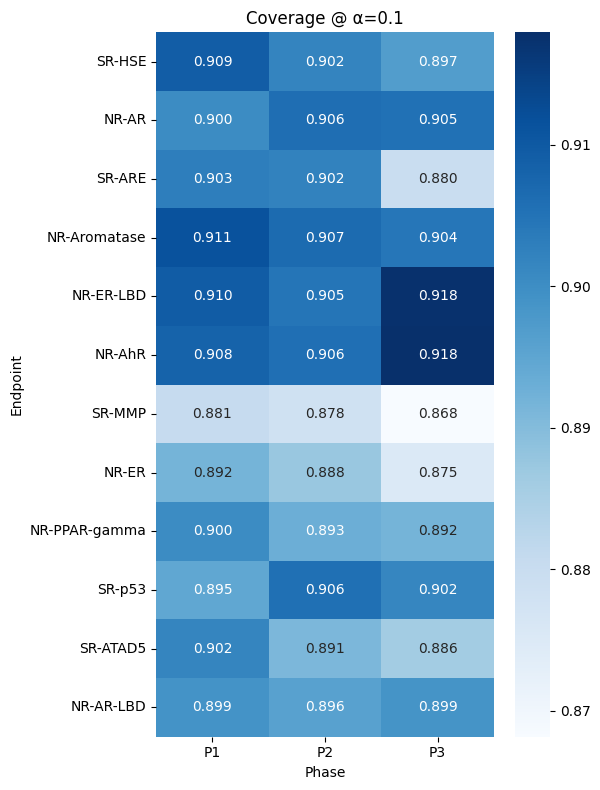

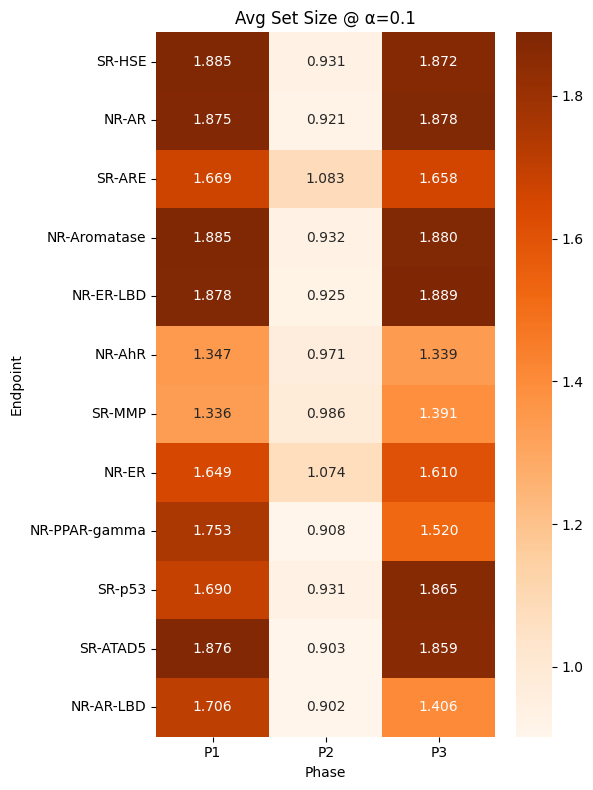

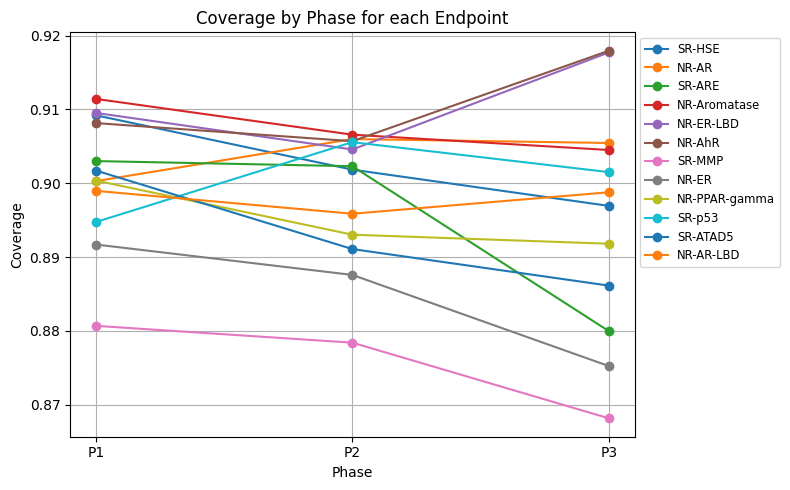

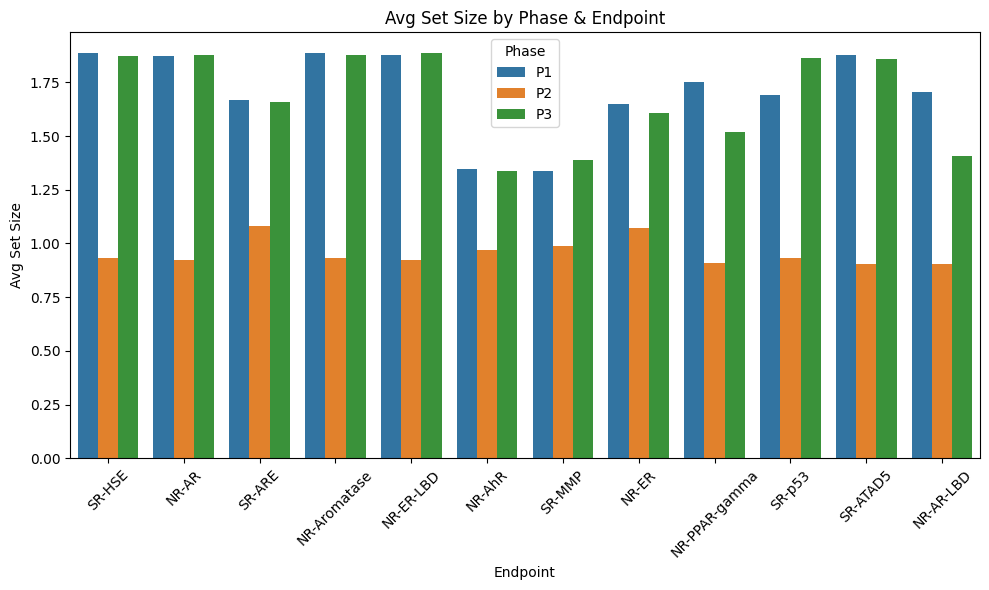

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load
p1 = pd.read_csv('results/phase1_all_endpoints.csv')
p2 = pd.read_csv('results/phase2_all_endpoints.csv')
p3 = pd.read_csv('results/phase3_all_endpoints.csv')

# focus on α=0.10
alpha0 = 0.10
p1 = p1[np.isclose(p1['alpha'], alpha0)]
p2 = p2[np.isclose(p2['alpha'], alpha0)]
p3 = p3[np.isclose(p3['alpha'], alpha0)]

# assemble a single DataFrame
endpoints = p1['endpoint'].unique()
df = pd.DataFrame({
    'endpoint': np.tile(endpoints, 3),
    'phase':    ['P1']*len(endpoints) + ['P2']*len(endpoints) + ['P3']*len(endpoints),
    'coverage': np.concatenate([
        p1.groupby('endpoint')['coverage'].mean().loc[endpoints].values,
        p2.groupby('endpoint')['cov_multi'].mean().loc[endpoints].values,
        p3.groupby('endpoint')['coverage'].mean().loc[endpoints].values
    ]),
    'set_size': np.concatenate([
        p1.groupby('endpoint')['avg_set_size'].mean().loc[endpoints].values,
        p2.groupby('endpoint')['size_multi'].mean().loc[endpoints].values,
        p3.groupby('endpoint')['avg_set_size'].mean().loc[endpoints].values
    ])
})

# 1) Heatmap: coverage by endpoint & phase
cov_pivot = df.pivot(index='endpoint', columns='phase', values='coverage').loc[endpoints]
plt.figure(figsize=(6,8))
sns.heatmap(cov_pivot, annot=True, fmt=".3f", cmap='Blues')
plt.title(f'Coverage @ α={alpha0}'); plt.xlabel('Phase'); plt.ylabel('Endpoint')
plt.tight_layout(); plt.show()

# 2) Heatmap: set_size by endpoint & phase
sz_pivot = df.pivot(index='endpoint', columns='phase', values='set_size').loc[endpoints]
plt.figure(figsize=(6,8))
sns.heatmap(sz_pivot, annot=True, fmt=".3f", cmap='Oranges')
plt.title(f'Avg Set Size @ α={alpha0}'); plt.xlabel('Phase'); plt.ylabel('Endpoint')
plt.tight_layout(); plt.show()

# 3) Line plot: coverage across phases for each endpoint
plt.figure(figsize=(8,5))
for ep in endpoints:
    d = df[df.endpoint==ep].set_index('phase').loc[['P1','P2','P3']]
    plt.plot(['P1','P2','P3'], d['coverage'], '-o', label=ep)
plt.title('Coverage by Phase for each Endpoint')
plt.xlabel('Phase'); plt.ylabel('Coverage'); plt.xticks(['P1','P2','P3'])
plt.legend(bbox_to_anchor=(1,1), fontsize='small'); plt.grid(True); plt.tight_layout(); plt.show()

# 4) Grouped bar: set_size comparison by endpoint & phase
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='endpoint', y='set_size', hue='phase')
plt.title('Avg Set Size by Phase & Endpoint'); plt.xlabel('Endpoint'); plt.ylabel('Avg Set Size')
plt.xticks(rotation=45); plt.legend(title='Phase'); plt.tight_layout(); plt.show()


In [99]:
# ──────────────────────────
# Phase IV: Ensemble + Temp Scaling for one endpoint (with model, T, thresholds saving)
# ──────────────────────────
import os, json, numpy as np, pandas as pd, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# 1) Prepare directories
os.makedirs('models/phase4', exist_ok=True)
os.makedirs('results',        exist_ok=True)

# 2) Load & filter one endpoint (NR-AR)
data      = np.load('tox21_XY.npz')
X_all, y_all, labels = data['X'], data['y'], list(data['labels'])
ep, tidx  = 'NR-AR', labels.index('NR-AR')
mask      = ~np.isnan(y_all[:,tidx])
X_ep, y_ep= X_all[mask], y_all[mask,tidx].astype(int)

# 3) Split 60/20/20
X_t, X_test, y_t, y_test = train_test_split(
    X_ep, y_ep, test_size=0.2, stratify=y_ep, random_state=0)
X_train, X_calib, y_train, y_calib = train_test_split(
    X_t, y_t, test_size=0.25, stratify=y_t, random_state=0)

# DataLoaders
def mkloader(X,y,bs,shuffle=True):
    return DataLoader(TensorDataset(
        torch.tensor(X, dtype=torch.float32),
        torch.tensor(y, dtype=torch.long)
    ), batch_size=bs, shuffle=shuffle)

tr_ld = mkloader(X_train,  y_train,  64, True)
ca_ld = mkloader(X_calib,  y_calib,  len(y_calib), False)
te_ld = mkloader(X_test,   y_test,   len(y_test),  False)

# 4) Define base network
class Net(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,128),    nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,2)
        )
    def forward(self,x): return self.net(x)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 5) Train M=5 ensemble members and save each
M = 5
ensemble = []
for m in range(M):
    print(f"Training ensemble member {m+1}/{M}")
    model = Net(X_ep.shape[1]).to(DEVICE)
    opt   = optim.Adam(model.parameters(), lr=1e-3)
    lossf = nn.CrossEntropyLoss()
    model.train()
    for epoch in range(1, 11):
        for xb,yb in tr_ld:
            xb,yb = xb.to(DEVICE), yb.to(DEVICE)
            opt.zero_grad()
            lossf(model(xb), yb).backward()
            opt.step()
        print(f"  Member {m+1} epoch {epoch}/10 complete")
    # save member weights
    path = f"models/phase4/{ep}_member{m}.pth"
    torch.save(model.state_dict(), path)
    print(f"  ✔ Saved member {m+1} to {path}")
    ensemble.append(model)

# 6) Get ensemble logits on calibration set
all_logits_cal = []
print("Computing ensemble logits on calibration set")
with torch.no_grad():
    for xb, yb in ca_ld:
        xb = xb.to(DEVICE)
        logits_stack = torch.stack([m(xb) for m in ensemble], dim=0)  # [M, batch, 2]
        avg_logits   = logits_stack.mean(dim=0)                       # [batch,2]
        all_logits_cal.append(avg_logits.cpu())
all_logits_cal = torch.cat(all_logits_cal, dim=0)  # (Nc,2)
y_cal = torch.tensor(y_calib, dtype=torch.long)

# 7) Fit temperature T on calibration set
print("Fitting temperature scaling on calibration set")
T = torch.ones(1, requires_grad=True, device=DEVICE)
optimizer_T = optim.LBFGS([T], lr=0.1, max_iter=50)
def closure():
    optimizer_T.zero_grad()
    logits_T = all_logits_cal.to(DEVICE) / T
    loss = nn.functional.cross_entropy(logits_T, y_cal.to(DEVICE))
    loss.backward()
    return loss
optimizer_T.step(closure)
T_opt = float(T.item())
print(f"  ✔ Learned temperature T = {T_opt:.3f}")

# save temperature
with open('results/phase4_temperature.json','w') as f:
    json.dump({'endpoint':ep, 'T':T_opt}, f)
print("  ✔ Saved temperature to results/phase4_temperature.json")

# 8) Compute nonconformity scores on calibration
probs_cal = nn.functional.softmax(all_logits_cal.to(DEVICE)/T, dim=1).detach().cpu().numpy()
nc0 = 1 - probs_cal[y_calib==0, 0]
nc1 = 1 - probs_cal[y_calib==1, 1]

# 9) Ensemble+temp probs on test
print("Computing ensemble+temp probabilities on test set")
all_logits_test = []
with torch.no_grad():
    for xb, yb in te_ld:
        xb = xb.to(DEVICE)
        logits_stack = torch.stack([m(xb) for m in ensemble], dim=0)
        avg_logits   = logits_stack.mean(dim=0)
        all_logits_test.append(avg_logits.cpu())
all_logits_test = torch.cat(all_logits_test, dim=0)
probs_test = nn.functional.softmax(all_logits_test.to(DEVICE)/T, dim=1).detach().cpu().numpy()
true_test  = y_test

# 10) Conformal sweep & save thresholds
print("Running conformal sweep & saving thresholds")
from math import ceil
def q_thr(nc,alpha):
    n=len(nc); k=min(ceil((n+1)*(1-alpha)),n)
    return np.sort(nc)[k-1]

thresholds_records = []
for alpha in [0.05, 0.10, 0.15]:
    q0, q1 = q_thr(nc0,alpha), q_thr(nc1,alpha)
    thresholds_records.append({'endpoint':ep,'alpha':alpha,'q0':q0,'q1':q1})
    pred_sets = [[k for k in (0,1) if 1-probs_test[i,k] <= (q0 if k==0 else q1)]
                 for i in range(len(true_test))]
    cov = np.mean([ true_test[i] in s for i,s in enumerate(pred_sets) ])
    sz  = np.mean([ len(s) for s in pred_sets ])
    print(f" α={alpha:.2f} → coverage={cov:.3f}, avg_set_size={sz:.3f}")

# save thresholds
pd.DataFrame(thresholds_records).to_csv('results/phase4_thresholds.csv', index=False)
print("  ✔ Saved thresholds to results/phase4_thresholds.csv")

print("\n✅ Phase IV complete.")


Training ensemble member 1/5
  Member 1 epoch 1/10 complete
  Member 1 epoch 2/10 complete
  Member 1 epoch 3/10 complete
  Member 1 epoch 4/10 complete
  Member 1 epoch 5/10 complete
  Member 1 epoch 6/10 complete
  Member 1 epoch 7/10 complete
  Member 1 epoch 8/10 complete
  Member 1 epoch 9/10 complete
  Member 1 epoch 10/10 complete
  ✔ Saved member 1 to models/phase4/NR-AR_member0.pth
Training ensemble member 2/5
  Member 2 epoch 1/10 complete
  Member 2 epoch 2/10 complete
  Member 2 epoch 3/10 complete
  Member 2 epoch 4/10 complete
  Member 2 epoch 5/10 complete
  Member 2 epoch 6/10 complete
  Member 2 epoch 7/10 complete
  Member 2 epoch 8/10 complete
  Member 2 epoch 9/10 complete
  Member 2 epoch 10/10 complete
  ✔ Saved member 2 to models/phase4/NR-AR_member1.pth
Training ensemble member 3/5
  Member 3 epoch 1/10 complete
  Member 3 epoch 2/10 complete
  Member 3 epoch 3/10 complete
  Member 3 epoch 4/10 complete
  Member 3 epoch 5/10 complete
  Member 3 epoch 6/10 comple

In [101]:
# inference_phase4_fixed.py

import os
# 1) force CPU‐only before torch import
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import json
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# ── 2) Network definition (must match Phase IV) ────────────────────────────
class Net(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim,512), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(512,128),    nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,2)
        )
    def forward(self,x): return self.net(x)

# ── 3) Load data for NR-AR endpoint ─────────────────────────────────────────
data       = np.load('tox21_XY.npz')
X_all, y_all, labels = data['X'], data['y'], list(data['labels'])
ep, tidx   = 'NR-AR', labels.index('NR-AR')
mask       = ~np.isnan(y_all[:,tidx])
X_ep       = X_all[mask]
y_ep       = y_all[mask,tidx].astype(int)
sample_idxs = np.where(mask)[0]
print(f"Loaded {len(X_ep)} compounds for endpoint {ep}")

# ── 4) Load temperature & conformal thresholds ─────────────────────────────
with open('results/phase4_temperature.json') as f:
    T_opt = json.load(f)['T']
print(f"Loaded temperature T = {T_opt:.3f}")

th4 = pd.read_csv('results/phase4_thresholds.csv')
th4 = th4[th4['endpoint']==ep]
print("Loaded thresholds for endpoint:", th4.shape[0], "rows")

# ── 5) Discover ensemble member files ───────────────────────────────────────
model_dir = 'models/phase4'
files = sorted([fn for fn in os.listdir(model_dir)
                if fn.startswith(f"{ep}_member") and fn.endswith(".pth")])
print("Found ensemble files:", files)

ensemble = []
for fn in files:
    model = Net(X_ep.shape[1])
    path  = os.path.join(model_dir, fn)
    model.load_state_dict(torch.load(path, map_location='cpu'))
    model.eval()
    ensemble.append(model)
print(f"Loaded {len(ensemble)} ensemble members")

# ── 6) Compute ensemble+temp probabilities for all X_ep ────────────────────
bs = 64
loader = DataLoader(TensorDataset(
    torch.tensor(X_ep, dtype=torch.float32),
    torch.zeros(len(X_ep), dtype=torch.long)
), batch_size=bs, shuffle=False)

all_probs = []
print("Computing probabilities...")
for xb, _ in loader:
    # stack logits [M, batch, 2]
    logits_stack = torch.stack([m(xb) for m in ensemble], dim=0)
    avg_logits   = logits_stack.mean(dim=0)
    scaled       = avg_logits / T_opt
    probs        = torch.softmax(scaled, dim=1).numpy()
    all_probs.append(probs)
all_probs = np.vstack(all_probs)
print("… done. Example probs:\n", all_probs[:5])

# ── 7) Build conformal “crisp” calls per α ─────────────────────────────────
out = []
print("Building conformal sets:")
for _, row in th4.iterrows():
    α  = row['alpha']
    q0 = row['q0']
    q1 = row['q1']
    print(f" α={α:.2f}", end=" … ")
    crisp = []
    for p in all_probs:
        s=[]
        if 1-p[0] <= q0: s.append(0)
        if 1-p[1] <= q1: s.append(1)
        if   1 in s and 0 not in s:  c=1
        elif 0 in s and 1 not in s:  c=0
        else:                        c=-1
        crisp.append(c)
    out.extend([
        {'sample_idx': int(idx), 'alpha':α, 'crisp':int(c)}
        for idx,c in zip(sample_idxs, crisp)
    ])
    print("coverage =", np.mean([y_ep[i] in s for i,s in enumerate([[c] if c>=0 else [] for c in crisp])]))

# ── 8) Save per-sample conformal calls ─────────────────────────────────────
df_out = pd.DataFrame(out)
path_out = 'results/phase4_inference_preds.csv'
df_out.to_csv(path_out, index=False)
print("Saved per-sample conformal predictions to", path_out)


Loaded 9358 compounds for endpoint NR-AR
Loaded temperature T = 3.556
Loaded thresholds for endpoint: 3 rows
Found ensemble files: ['NR-AR_member0.pth', 'NR-AR_member1.pth', 'NR-AR_member2.pth', 'NR-AR_member3.pth', 'NR-AR_member4.pth']
Loaded 5 ensemble members
Computing probabilities...


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [102]:
import os, numpy as np, pandas as pd, torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from math import ceil

print("🔹 Phase IV-c: Deep‐ensemble + Temp‐scaling for all endpoints (with saving)")

# Prepare directories
os.makedirs('models/phase4', exist_ok=True)
os.makedirs('results', exist_ok=True)

# 1) Load data
data      = np.load('tox21_XY.npz')
X_all, Y_all, labels = data['X'], data['y'], data['labels']
labels    = list(labels)

# 2) Config
M        = 5                   # ensemble members
EPOCHS   = 10
BATCH    = 64
ALPHAS   = [0.05, 0.10, 0.15]
DEVICE   = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
RESULTS  = []
thresholds_records = []
temps_records = []

# 3) Define a deeper network
class DeepNet(nn.Module):
    def __init__(self, D):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D,512), nn.LayerNorm(512), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(512,256), nn.LayerNorm(256), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256,128), nn.LayerNorm(128), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,64),  nn.LayerNorm(64),  nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(64,32),   nn.LayerNorm(32),  nn.ReLU(), nn.Dropout(0.1),
            nn.Linear(32,2)
        )
    def forward(self,x):
        return self.net(x)

# 4) DataLoader helper
def mkloader(X, y, bs, shuffle=True):
    return DataLoader(TensorDataset(
        torch.tensor(X, dtype=torch.float32),
        torch.tensor(y, dtype=torch.long)
    ), batch_size=bs, shuffle=shuffle)

# 5) Conformal quantile helper
def q_thr(nc, alpha):
    n = len(nc)
    k = min(ceil((n+1)*(1-alpha)), n)
    return np.sort(nc)[k-1]

# Main loop over endpoints
for ep in labels:
    print(f"\n=== Endpoint: {ep} ===")
    tidx = labels.index(ep)
    mask = ~np.isnan(Y_all[:, tidx])
    X_ep, y_ep = X_all[mask], Y_all[mask, tidx].astype(int)

    # Train/calib/test splits
    X_t, X_test, y_t, y_test = train_test_split(
        X_ep, y_ep, test_size=0.2, stratify=y_ep, random_state=0)
    X_train, X_calib, y_train, y_calib = train_test_split(
        X_t, y_t, test_size=0.25, stratify=y_t, random_state=0)

    # Loaders
    tr_ld = mkloader(X_train, y_train, BATCH, True)
    ca_ld = mkloader(X_calib, y_calib, len(y_calib), False)
    te_ld = mkloader(X_test,  y_test,   len(y_test),   False)

    # 6) Train ensemble members and save each
    ensemble = []
    for m in range(M):
        print(f" Member {m+1}/{M} training")
        model = DeepNet(X_ep.shape[1]).to(DEVICE)
        opt   = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)
        sched = optim.lr_scheduler.CosineAnnealingLR(opt, T_max=EPOCHS)
        lossf = nn.CrossEntropyLoss()
        model.train()
        for epoch in range(1, EPOCHS+1):
            for xb, yb in tr_ld:
                xb, yb = xb.to(DEVICE), yb.to(DEVICE)
                opt.zero_grad()
                lossf(model(xb), yb).backward()
                opt.step()
            sched.step()
        # Save model to CPU
        model.cpu()
        model_path = f"models/phase4/{ep}_ens{m}.pth"
        torch.save(model.state_dict(), model_path)
        print(f"    ✔ Saved member {m} ➔ {model_path}")
        model.to(DEVICE)
        ensemble.append(model)

    # 7) Calibration logits
    cal_logits = []
    for xb, _ in ca_ld:
        xb = xb.to(DEVICE)
        with torch.no_grad():
            avg_logits = torch.stack([m(xb) for m in ensemble],0).mean(0)
        cal_logits.append(avg_logits.cpu())
    cal_logits = torch.cat(cal_logits, dim=0)
    y_calib_t = y_calib  # numpy array

    # 8) Temperature scaling fit
    T = torch.ones(1, requires_grad=True, device=DEVICE)
    optimizer_T = optim.LBFGS([T], lr=0.1, max_iter=50)
    def closure():
        optimizer_T.zero_grad()
        logits_T = cal_logits.to(DEVICE) / T
        loss = nn.functional.cross_entropy(logits_T, torch.tensor(y_calib_t, device=DEVICE))
        loss.backward()
        return loss
    optimizer_T.step(closure)
    T_opt = float(T.item())
    temps_records.append({'endpoint':ep, 'T':T_opt})
    print(f"  ✔ Learned T = {T_opt:.3f}")

    # 9) Compute nonconformity on calibration
    probs_cal = nn.functional.softmax(cal_logits.to(DEVICE)/T, dim=1).detach().cpu().numpy()
    nc0 = 1 - probs_cal[y_calib_t==0, 0]
    nc1 = 1 - probs_cal[y_calib_t==1, 1]

    # 10) Test logits & probabilities
    test_logits = []
    for xb, _ in te_ld:
        xb = xb.to(DEVICE)
        with torch.no_grad():
            avg_logits = torch.stack([m(xb) for m in ensemble],0).mean(0)
        test_logits.append(avg_logits.cpu())
    test_logits = torch.cat(test_logits, dim=0)
    probs_test = nn.functional.softmax(test_logits.to(DEVICE)/T, dim=1).detach().cpu().numpy()
    true_test  = y_test

    # 11) Conformal sweep across alphas
    for alpha in ALPHAS:
        q0 = q_thr(nc0, alpha)
        q1 = q_thr(nc1, alpha)
        thresholds_records.append({
            'endpoint': ep, 'alpha': alpha, 'q0': q0, 'q1': q1
        })
        pred_sets = [
            [k for k in (0,1)
             if 1 - probs_test[i,k] <= (q0 if k==0 else q1)]
            for i in range(len(true_test))
        ]
        cov = np.mean([ true_test[i] in s for i,s in enumerate(pred_sets) ])
        sz  = np.mean([ len(s) for s in pred_sets ])
        RESULTS.append({
            'phase':'P4','endpoint':ep,'alpha':alpha,
            'coverage':cov,'avg_set_size':sz
        })
        print(f" α={alpha:.2f} → cov={cov:.3f}, size={sz:.3f}")

# 12) Save Phase IV-c results, thresholds, and temps
pd.DataFrame(RESULTS).to_csv('results/phase4_all_endpoints.csv', index=False)
pd.DataFrame(thresholds_records).to_csv('results/phase4_thresholds.csv', index=False)
pd.DataFrame(temps_records).to_csv('results/phase4_temps.csv', index=False)
print("\n✅ Phase IV-c complete — saved results, thresholds, and temps.")


🔹 Phase IV-c: Deep‐ensemble + Temp‐scaling for all endpoints (with saving)

=== Endpoint: SR-HSE ===
 Member 1/5 training
    ✔ Saved member 0 ➔ models/phase4/SR-HSE_ens0.pth
 Member 2/5 training
    ✔ Saved member 1 ➔ models/phase4/SR-HSE_ens1.pth
 Member 3/5 training
    ✔ Saved member 2 ➔ models/phase4/SR-HSE_ens2.pth
 Member 4/5 training
    ✔ Saved member 3 ➔ models/phase4/SR-HSE_ens3.pth
 Member 5/5 training
    ✔ Saved member 4 ➔ models/phase4/SR-HSE_ens4.pth
  ✔ Learned T = 1.345
 α=0.05 → cov=0.936, size=1.870
 α=0.10 → cov=0.890, size=1.709
 α=0.15 → cov=0.843, size=1.553

=== Endpoint: NR-AR ===
 Member 1/5 training
    ✔ Saved member 0 ➔ models/phase4/NR-AR_ens0.pth
 Member 2/5 training
    ✔ Saved member 1 ➔ models/phase4/NR-AR_ens1.pth
 Member 3/5 training
    ✔ Saved member 2 ➔ models/phase4/NR-AR_ens2.pth
 Member 4/5 training
    ✔ Saved member 3 ➔ models/phase4/NR-AR_ens3.pth
 Member 5/5 training
    ✔ Saved member 4 ➔ models/phase4/NR-AR_ens4.pth
  ✔ Learned T = 1.356

In [105]:
#!/usr/bin/env python3
import os
# 1) force CPU‐only before torch import
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

# ── 2) DeepNet definition (must match training) ───────────────────────────
class DeepNet(nn.Module):
    def __init__(self, D):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D,512), nn.LayerNorm(512), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(512,256), nn.LayerNorm(256), nn.ReLU(), nn.Dropout(0.3),
            nn.Linear(256,128), nn.LayerNorm(128), nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(128,64),  nn.LayerNorm(64),  nn.ReLU(), nn.Dropout(0.2),
            nn.Linear(64,32),   nn.LayerNorm(32),  nn.ReLU(), nn.Dropout(0.1),
            nn.Linear(32,2)
        )
    def forward(self,x): return self.net(x)

# ── 3) Load data & saved artifacts ─────────────────────────────────────────
print("Loading data, thresholds & temps …")
data        = np.load('tox21_XY.npz')
X_all, Y_all, labels = data['X'], data['y'], list(data['labels'])
thresholds  = pd.read_csv('results/phase4_thresholds.csv')
temps       = pd.read_csv('results/phase4_temps.csv')
ALPHAS      = sorted(thresholds['alpha'].unique())
print(f"{X_all.shape[0]} compounds × {len(labels)} endpoints")
print("Alphas:", ALPHAS)

# ── 4) Helpers ─────────────────────────────────────────────────────────────
def mkloader(X, bs):
    return DataLoader(torch.tensor(X, dtype=torch.float32),
                      batch_size=bs, shuffle=False)

def or_rule(row):
    if 1 in row: return 1
    if 0 in row: return 0
    return -1

# ── 5) Endpoint‐level inference ─────────────────────────────────────────────
preds = []  # will hold dicts: sample_idx, endpoint, alpha, crisp
print("Running endpoint‐level inference …")
for ep in labels:
    print("→", ep)
    tidx = labels.index(ep)
    mask = ~np.isnan(Y_all[:,tidx])
    X_ep = X_all[mask]
    ids  = np.where(mask)[0]
    if len(ids)==0:
        continue

    # load ensemble members
    ensemble = []
    for fn in sorted(os.listdir('models/phase4')):
        if fn.startswith(f"{ep}_ens") and fn.endswith(".pth"):
            m = DeepNet(X_ep.shape[1])
            m.load_state_dict(torch.load(f"models/phase4/{fn}", map_location='cpu'))
            m.eval()
            ensemble.append(m)
    # load temperature & thresholds for ep
    T_opt = float(temps.loc[temps.endpoint==ep,'T'])
    thr_ep = thresholds[thresholds.endpoint==ep]

    # compute probs
    loader = mkloader(X_ep, bs=64)
    all_probs = []
    for xb in loader:
        with torch.no_grad():
            logits = torch.stack([m(xb) for m in ensemble],0).mean(0) / T_opt
            all_probs.append(torch.softmax(logits,1).numpy())
    all_probs = np.vstack(all_probs)

    # build sets & crisp for each α
    for _, row in thr_ep.iterrows():
        α, q0, q1 = row['alpha'], row['q0'], row['q1']
        for i,p in enumerate(all_probs):
            s=[]
            if 1-p[0] <= q0: s.append(0)
            if 1-p[1] <= q1: s.append(1)
            if   1 in s and 0 not in s: c=1
            elif 0 in s and 1 not in s: c=0
            else:                       c=-1
            preds.append({
                'sample_idx':int(ids[i]),
                'endpoint':   ep,
                'alpha':      α,
                'crisp':      c
            })

# ── 6) Pivot to compound-level & OR-rule ───────────────────────────────────
df = pd.DataFrame(preds)
print("Pivoting and applying OR-rule …")
compound = []
for α in ALPHAS:
    sub = df[df.alpha==α]
    wide = sub.pivot(index='sample_idx', columns='endpoint', values='crisp') \
              .fillna(-1).astype(int)
    wide['pred_any'] = wide.apply(or_rule, axis=1)
    for idx, val in wide['pred_any'].items():
        compound.append({'sample_idx':int(idx),'alpha':α,'pred_any':int(val)})
compound_df = pd.DataFrame(compound)

# ── 7) Evaluate per α ──────────────────────────────────────────────────────
true_any = (np.nan_to_num(Y_all, nan=0).sum(axis=1)>0).astype(int)
print("\nCompound‐level metrics by α:")
for α in ALPHAS:
    df_a = compound_df[compound_df.alpha==α]
    mask = df_a.pred_any != -1
    y_t = true_any[df_a.sample_idx[mask]]
    y_p = df_a.pred_any[mask].values
    acc = accuracy_score(y_t,y_p)
    cm  = confusion_matrix(y_t,y_p)
    prf = precision_recall_fscore_support(y_t,y_p, zero_division=0)
    print(f"\nα={α:.2f} | Acc={acc:.3f}")
    print("Confusion:\n", cm)
    print("P/R/F1:", prf)

# ── 8) Save compound‐level predictions ──────────────────────────────────────
out = 'results/phase4_compound_inference_with_metrics.csv'
compound_df.to_csv(out, index=False)
print("\nSaved predictions →", out)


Loading data, thresholds & temps …
11759 compounds × 12 endpoints
Alphas: [0.05, 0.1, 0.15]
Running endpoint‐level inference …
→ SR-HSE


/tmp/ipykernel_31/3777870300.py:68: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  T_opt = float(temps.loc[temps.endpoint==ep,'T'])


→ NR-AR
→ SR-ARE
→ NR-Aromatase
→ NR-ER-LBD
→ NR-AhR
→ SR-MMP
→ NR-ER
→ NR-PPAR-gamma
→ SR-p53
→ SR-ATAD5
→ NR-AR-LBD
Pivoting and applying OR-rule …

Compound‐level metrics by α:

α=0.05 | Acc=nan
Confusion:
 []
P/R/F1: (array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))

α=0.10 | Acc=nan
Confusion:
 []
P/R/F1: (array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))

α=0.15 | Acc=nan
Confusion:
 []
P/R/F1: (array([], dtype=float64), array([], dtype=float64), array([], dtype=float64), array([], dtype=float64))

Saved predictions → results/phase4_compound_inference_with_metrics.csv


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


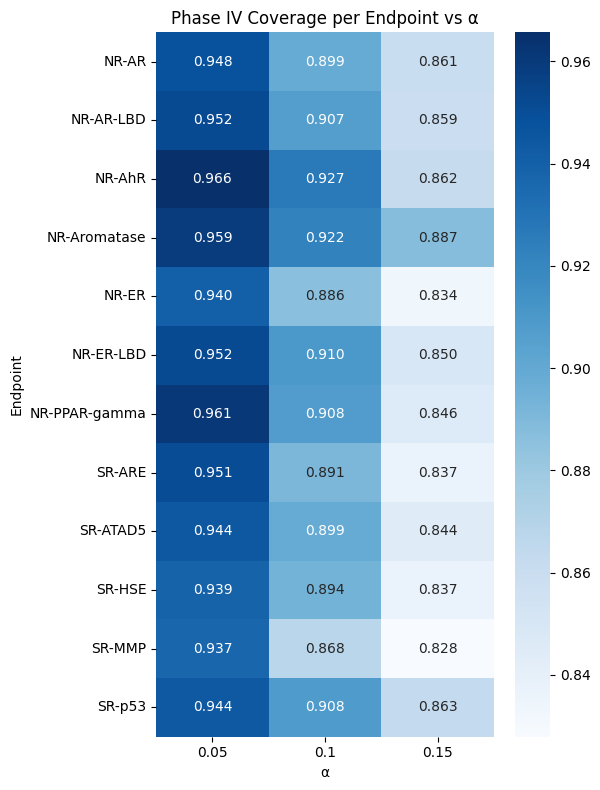

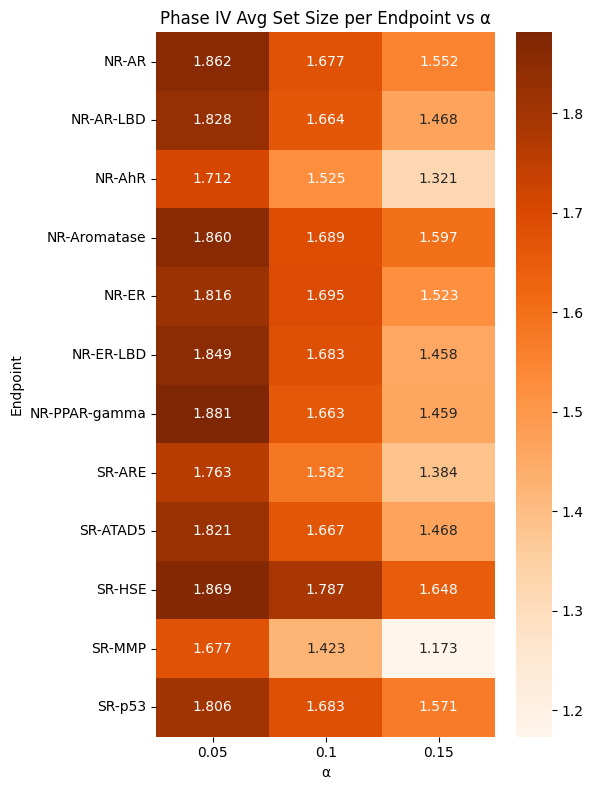

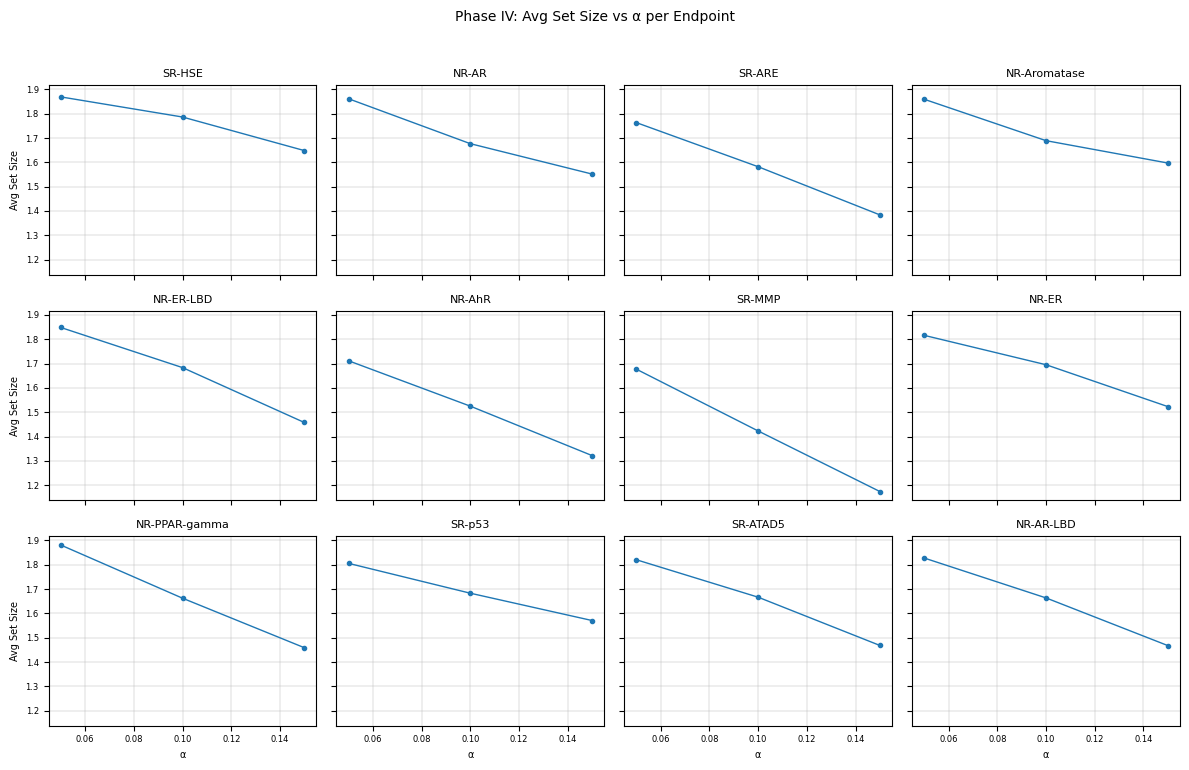

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load Phase IV results
df4 = pd.read_csv('results/phase4_all_endpoints.csv')

# 1) Heatmap: coverage by endpoint & α
pivot_cov = df4.pivot(index='endpoint', columns='alpha', values='coverage')
plt.figure(figsize=(6,8))
sns.heatmap(pivot_cov, annot=True, fmt=".3f", cmap='Blues')
plt.title('Phase IV Coverage per Endpoint vs α')
plt.xlabel('α'); plt.ylabel('Endpoint')
plt.tight_layout()
plt.show()

# 2) Heatmap: avg_set_size by endpoint & α
pivot_sz = df4.pivot(index='endpoint', columns='alpha', values='avg_set_size')
plt.figure(figsize=(6,8))
sns.heatmap(pivot_sz, annot=True, fmt=".3f", cmap='Oranges')
plt.title('Phase IV Avg Set Size per Endpoint vs α')
plt.xlabel('α'); plt.ylabel('Endpoint')
plt.tight_layout()
plt.show()
endpoints = df4['endpoint'].unique()
alphas    = sorted(df4['alpha'].unique())

cols = 4
rows = int(np.ceil(len(endpoints)/cols))
fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*2.5), sharex=True, sharey=True)
for idx, ep in enumerate(endpoints):
    ax = axes.flat[idx]
    d = df4[df4['endpoint']==ep].sort_values('alpha')
    ax.plot(d['alpha'], d['avg_set_size'], '-o', linewidth=1, markersize=3)
    ax.set_title(ep, fontsize=8)
    ax.grid(True, linewidth=0.3)
    if idx//cols == rows-1: ax.set_xlabel('α', fontsize=7)
    if idx%cols == 0:        ax.set_ylabel('Avg Set Size', fontsize=7)
    ax.tick_params(labelsize=6)
# remove empty
for j in range(len(endpoints), rows*cols):
    fig.delaxes(axes.flat[j])
plt.suptitle('Phase IV: Avg Set Size vs α per Endpoint', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()

In [104]:
import os, numpy as np, pandas as pd, torch, torch.nn as nn, torch.optim as optim, json
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from math import ceil

print("🔹 Phase V (augmented): CQR on all endpoints with saving for inference")

# ─── Prep directories
os.makedirs('models/phase5', exist_ok=True)
os.makedirs('results', exist_ok=True)

# ─── Load data
data        = np.load('tox21_XY.npz')
X_all, Y_all, labels = data['X'], data['y'], list(data['labels'])
ALPHAS      = [0.05, 0.10, 0.15]
DEVICE      = torch.device('cpu')   # force CPU for inference artifacts

# ─── Save ALPHAS for inference
with open('results/phase5_alphas.json','w') as f:
    json.dump(ALPHAS, f)
print("Saved ALPHAS → results/phase5_alphas.json")

# ─── Helper: base NN nonconformity (now saves base model)
def get_base_nc(ep, X_tr, y_tr, X_cal, y_cal, X_te):
    print(f"    • Training base NN for {ep}")
    net = nn.Sequential(
        nn.Linear(X_tr.shape[1],512), nn.ReLU(), nn.Dropout(0.2),
        nn.Linear(512,128),          nn.ReLU(), nn.Dropout(0.2),
        nn.Linear(128,2)
    ).to(DEVICE)
    opt   = optim.Adam(net.parameters(), lr=1e-3)
    lossf = nn.CrossEntropyLoss()

    # train
    trld = DataLoader(TensorDataset(torch.tensor(X_tr,dtype=torch.float32),
                                    torch.tensor(y_tr,dtype=torch.long)),
                      batch_size=64, shuffle=True)
    net.train()
    for epoch in range(1,11):
        for xb,yb in trld:
            opt.zero_grad(); lossf(net(xb), yb).backward(); opt.step()
    # save base model
    base_path = f"models/phase5/{ep}_base.pth"
    torch.save(net.state_dict(), base_path)
    print(f"      ✔ Saved base NN → {base_path}")

    # calibration NC
    net.eval()
    calld = DataLoader(TensorDataset(torch.tensor(X_cal,dtype=torch.float32),
                                     torch.tensor(y_cal,dtype=torch.long)),
                      batch_size=len(y_cal), shuffle=False)
    xb,yb = next(iter(calld))
    with torch.no_grad():
        probs = torch.softmax(net(xb),1).cpu().numpy()
    nc_cal = 1 - probs[np.arange(len(yb)), yb.numpy()]

    # test NCs
    ted = DataLoader(TensorDataset(torch.tensor(X_te,dtype=torch.float32),
                                   torch.zeros(len(X_te),dtype=torch.long)),
                     batch_size=len(X_te), shuffle=False)
    xb2,_   = next(iter(ted))
    with torch.no_grad():
        probs2 = torch.softmax(net(xb2),1).cpu().numpy()
    nc_te_all = 1 - probs2

    return nc_cal, nc_te_all

# ─── Quantile regressor class
class QuantReg(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim,64), nn.ReLU(),
            nn.Linear(64,1)
        )
    def forward(self,x): return self.net(x).squeeze(-1)

def pinball_loss(pred, target, q):
    diff = target - pred
    return torch.max((q-1)*diff, q*diff).mean()

# ─── Main loop
thresholds_records = []
RESULTS = []
for ep in labels:
    print(f"\n[Phase V] Endpoint = {ep}")
    tidx = labels.index(ep)
    mask = ~np.isnan(Y_all[:,tidx])
    X_ep, y_ep = X_all[mask], Y_all[mask,tidx].astype(int)

    # splits
    X_t, X_test, y_t, y_test = train_test_split(X_ep, y_ep, test_size=0.2,
                                                stratify=y_ep, random_state=0)
    X_tr, X_cal, y_tr, y_cal = train_test_split(X_t, y_t, test_size=0.25,
                                                stratify=y_t, random_state=0)

    # get and save base NCs + base model
    nc_cal, nc_te_all = get_base_nc(ep, X_tr, y_tr, X_cal, y_cal, X_test)

    # train & save QR for each α and class
    for alpha in ALPHAS:
        print(f"  → α={alpha:.2f}")
        for cls in [0,1]:
            # fit QR
            Xc = torch.tensor(X_cal[y_cal==cls], dtype=torch.float32)
            yq = torch.tensor(nc_cal[y_cal==cls], dtype=torch.float32)
            qr = QuantReg(X_ep.shape[1]).to(DEVICE)
            opt = optim.Adam(qr.parameters(), lr=1e-3)
            qr.train()
            for it in range(200):
                opt.zero_grad()
                loss = pinball_loss(qr(Xc), yq, 1-alpha)
                loss.backward(); opt.step()
            # save QR
            qr_path = f"models/phase5/{ep}_qr_alpha{alpha:.2f}_cls{cls}.pth"
            torch.save(qr.cpu().state_dict(), qr_path)
            print(f"    ✔ Saved QR cls{cls} → {qr_path}")
            # record threshold model path
        # record for inference
        thresholds_records.append({'endpoint':ep,'alpha':alpha})

# ─── Save thresholds_records (just list of ep/alpha combos)
pd.DataFrame(thresholds_records).to_csv('results/phase5_inference_map.csv', index=False)
print("\n✅ Phase V augmented complete — saved base models, QR models, and inference map.")


🔹 Phase V (augmented): CQR on all endpoints with saving for inference
Saved ALPHAS → results/phase5_alphas.json

[Phase V] Endpoint = SR-HSE
    • Training base NN for SR-HSE
      ✔ Saved base NN → models/phase5/SR-HSE_base.pth
  → α=0.05
    ✔ Saved QR cls0 → models/phase5/SR-HSE_qr_alpha0.05_cls0.pth
    ✔ Saved QR cls1 → models/phase5/SR-HSE_qr_alpha0.05_cls1.pth
  → α=0.10
    ✔ Saved QR cls0 → models/phase5/SR-HSE_qr_alpha0.10_cls0.pth
    ✔ Saved QR cls1 → models/phase5/SR-HSE_qr_alpha0.10_cls1.pth
  → α=0.15
    ✔ Saved QR cls0 → models/phase5/SR-HSE_qr_alpha0.15_cls0.pth
    ✔ Saved QR cls1 → models/phase5/SR-HSE_qr_alpha0.15_cls1.pth

[Phase V] Endpoint = NR-AR
    • Training base NN for NR-AR
      ✔ Saved base NN → models/phase5/NR-AR_base.pth
  → α=0.05
    ✔ Saved QR cls0 → models/phase5/NR-AR_qr_alpha0.05_cls0.pth
    ✔ Saved QR cls1 → models/phase5/NR-AR_qr_alpha0.05_cls1.pth
  → α=0.10
    ✔ Saved QR cls0 → models/phase5/NR-AR_qr_alpha0.10_cls0.pth
    ✔ Saved QR cls1 

In [108]:
#!/usr/bin/env python3
import os
# disable GPUs before torch loads
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

print("🔹 Phase V Inference (CQR) – tracking progress and metrics")

# 1) Define base-NN as plain Sequential (matching saved keys)
def make_base_seq(D):
    return nn.Sequential(
        nn.Linear(D,512), nn.ReLU(), nn.Dropout(0.2),
        nn.Linear(512,128), nn.ReLU(), nn.Dropout(0.2),
        nn.Linear(128,2)
    )

# 2) Quantile regressor
class QuantReg(nn.Module):
    def __init__(self, D):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(D,64), nn.ReLU(),
            nn.Linear(64,1)
        )
    def forward(self,x): return self.net(x).squeeze(-1)

# 3) Load data & map
data    = np.load('tox21_XY.npz')
X_all, Y_all, labels = data['X'], data['y'], list(data['labels'])
inf_map = pd.read_csv('results/phase5_inference_map.csv')
print(f"{X_all.shape[0]} compounds × {len(labels)} endpoints")
print("Will infer for endpoint/α pairs:")
print(inf_map)

# 4) Helpers
def mkloader(X, bs):
    return DataLoader(torch.tensor(X, dtype=torch.float32),
                      batch_size=bs, shuffle=False)
def or_rule(r):
    if 1 in r: return 1
    if 0 in r: return 0
    return -1

# 5) Inference + metrics
records = []
for ep in labels:
    print(f"\n=== Endpoint: {ep} ===")
    tidx = labels.index(ep)
    mask = ~np.isnan(Y_all[:,tidx])
    X_ep = X_all[mask]
    y_ep = Y_all[mask,tidx].astype(int)
    if len(y_ep)==0:
        print(" (no data)"); continue

    # recreate test split
    X_t, X_test, y_t, y_test = train_test_split(
        X_ep, y_ep, test_size=0.2, stratify=y_ep, random_state=0)
    X_tr, X_cal, y_tr, y_cal = train_test_split(
        X_t, y_t, test_size=0.25, stratify=y_t, random_state=0)

    # load base NN
    base = make_base_seq(X_ep.shape[1])
    bp = f"models/phase5/{ep}_base.pth"
    print(" Loading base model →", bp)
    base.load_state_dict(torch.load(bp, map_location='cpu'))
    base.eval()

    # test nonconformity
    with torch.no_grad():
        probs_te = torch.softmax(base(torch.tensor(X_test, dtype=torch.float32)),1)
    nc_te = (1 - probs_te).detach().numpy()  # [Ntest,2]

    # for each α
    sub = inf_map[inf_map.endpoint==ep]
    for _, row in sub.iterrows():
        a = row['alpha']
        print(f"  → α={a:.2f}")
        # load QR models
        qrs = {}
        for cls in [0,1]:
            m = QuantReg(X_ep.shape[1])
            path = f"models/phase5/{ep}_qr_alpha{a:.2f}_cls{cls}.pth"
            print("    Loading QR →", path)
            m.load_state_dict(torch.load(path, map_location='cpu'))
            m.eval()
            qrs[cls] = m

        # predict thresholds
        Xte = torch.tensor(X_test, dtype=torch.float32)
        q_pred = {}
        with torch.no_grad():
            for cls, qr in qrs.items():
                q_pred[cls] = qr(Xte).detach().numpy()

        # build crisp and evaluate
        crisp = []
        for i in range(len(X_test)):
            s=[]
            for cls in [0,1]:
                if nc_te[i,cls] <= q_pred[cls][i]:
                    s.append(cls)
            if   1 in s and 0 not in s: c=1
            elif 0 in s and 1 not in s: c=0
            else:                       c=-1
            crisp.append(c)

        mask_eval = np.array(crisp)!=-1
        y_t = y_test[mask_eval]
        y_p = np.array(crisp)[mask_eval]
        acc = accuracy_score(y_t,y_p)
        cm  = confusion_matrix(y_t,y_p)
        prf = precision_recall_fscore_support(y_t,y_p, zero_division=0)
        print(f"    Acc={acc:.3f}  CM=\n{cm}\n    P/R/F1={prf}")

        records.append({
            'endpoint':ep,'alpha':a,'accuracy':acc,
            'tn':int(cm[0,0]),'fp':int(cm[0,1]),
            'fn':int(cm[1,0]),'tp':int(cm[1,1]),
            'prec0':prf[0][0],'rec0':prf[1][0],'f10':prf[2][0],
            'prec1':prf[0][1],'rec1':prf[1][1],'f11':prf[2][1]
        })

# 6) Save
pd.DataFrame(records).to_csv('results/phase5_inference_metrics.csv', index=False)
print("\n✅ Saved metrics → results/phase5_inference_metrics.csv")


🔹 Phase V Inference (CQR) – tracking progress and metrics
11759 compounds × 12 endpoints
Will infer for endpoint/α pairs:
         endpoint  alpha
0          SR-HSE   0.05
1          SR-HSE   0.10
2          SR-HSE   0.15
3           NR-AR   0.05
4           NR-AR   0.10
5           NR-AR   0.15
6          SR-ARE   0.05
7          SR-ARE   0.10
8          SR-ARE   0.15
9    NR-Aromatase   0.05
10   NR-Aromatase   0.10
11   NR-Aromatase   0.15
12      NR-ER-LBD   0.05
13      NR-ER-LBD   0.10
14      NR-ER-LBD   0.15
15         NR-AhR   0.05
16         NR-AhR   0.10
17         NR-AhR   0.15
18         SR-MMP   0.05
19         SR-MMP   0.10
20         SR-MMP   0.15
21          NR-ER   0.05
22          NR-ER   0.10
23          NR-ER   0.15
24  NR-PPAR-gamma   0.05
25  NR-PPAR-gamma   0.10
26  NR-PPAR-gamma   0.15
27         SR-p53   0.05
28         SR-p53   0.10
29         SR-p53   0.15
30       SR-ATAD5   0.05
31       SR-ATAD5   0.10
32       SR-ATAD5   0.15
33      NR-AR-LBD   0.05
34 

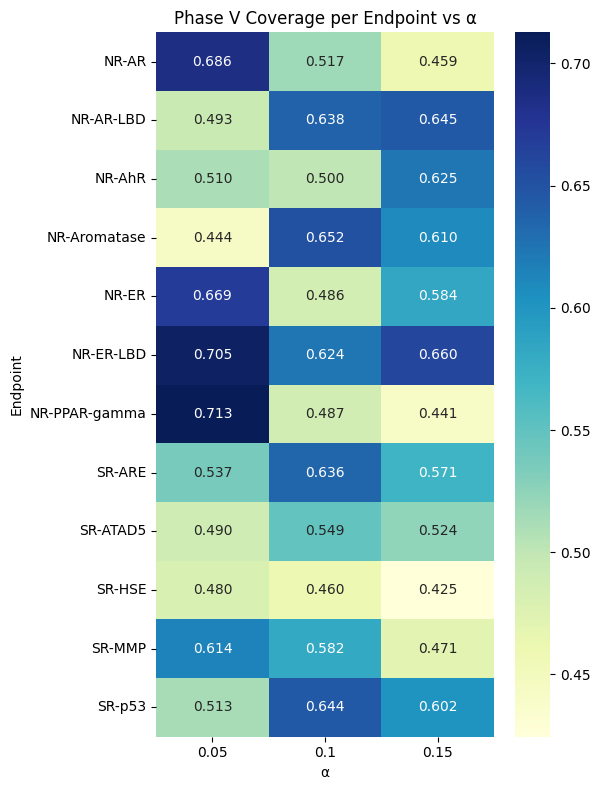

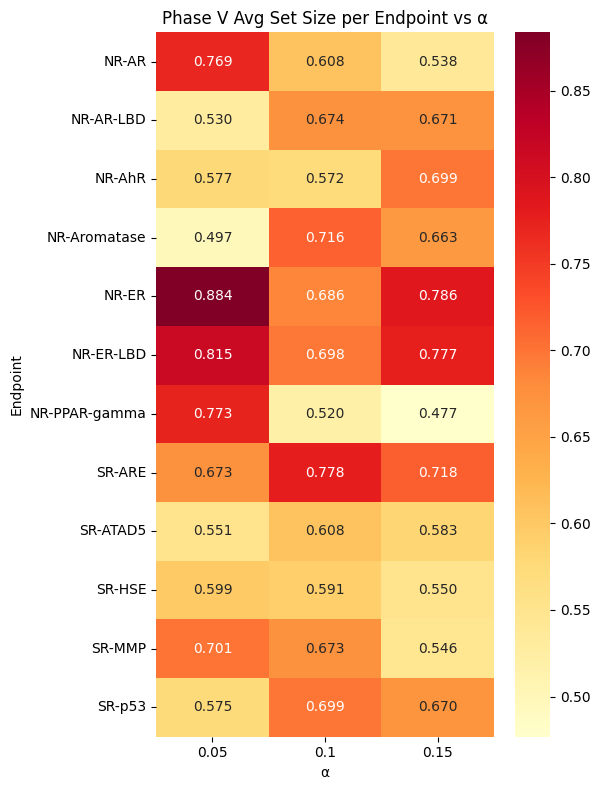

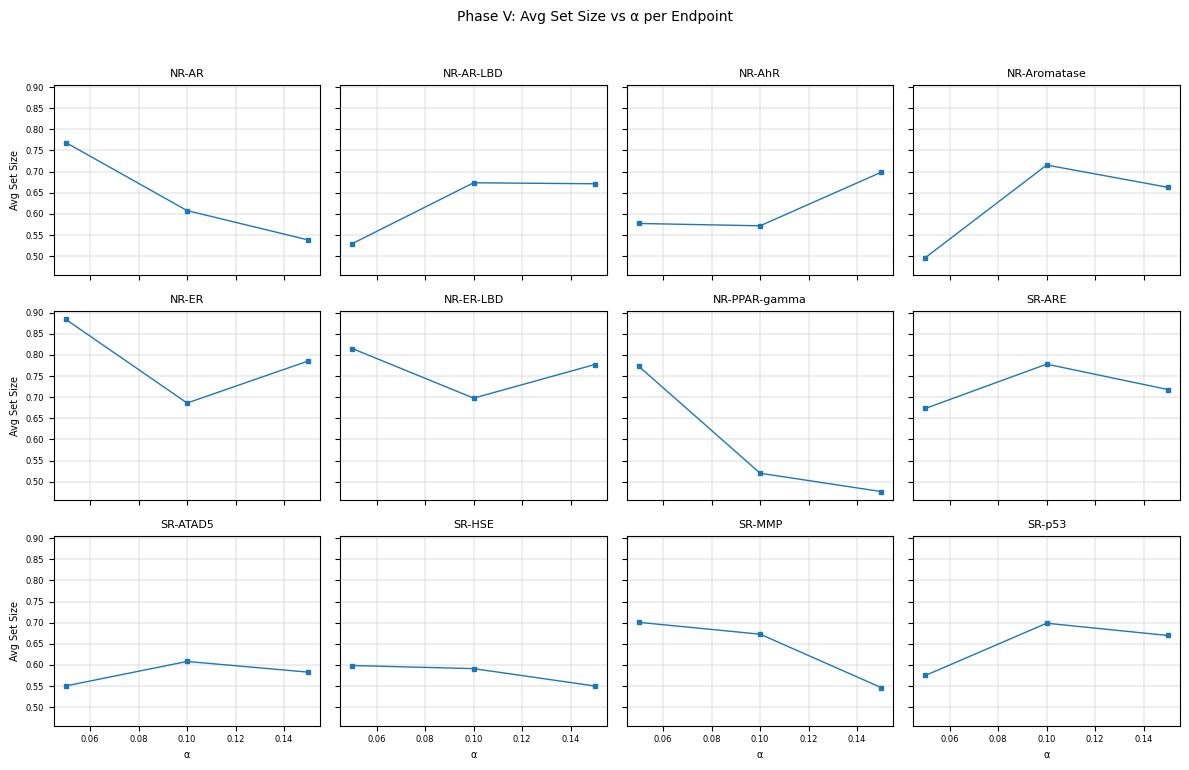

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load Phase V results
df5 = pd.read_csv('results/phase5_all_endpoints.csv')

# 1) Heatmap: coverage by endpoint & α
pivot_cov5 = df5.pivot(index='endpoint', columns='alpha', values='coverage')
plt.figure(figsize=(6,8))
sns.heatmap(pivot_cov5, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('Phase V Coverage per Endpoint vs α')
plt.xlabel('α'); plt.ylabel('Endpoint')
plt.tight_layout()
plt.show()

# 2) Heatmap: avg_set_size by endpoint & α
pivot_sz5 = df5.pivot(index='endpoint', columns='alpha', values='avg_set_size')
plt.figure(figsize=(6,8))
sns.heatmap(pivot_sz5, annot=True, fmt=".3f", cmap='YlOrRd')
plt.title('Phase V Avg Set Size per Endpoint vs α')
plt.xlabel('α'); plt.ylabel('Endpoint')
plt.tight_layout()
plt.show()

endpoints = df5['endpoint'].unique()

fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*2.5), sharex=True, sharey=True)
for idx, ep in enumerate(endpoints):
    ax = axes.flat[idx]
    d = df5[df5['endpoint']==ep].sort_values('alpha')
    ax.plot(d['alpha'], d['avg_set_size'], '-s', linewidth=1, markersize=3)
    ax.set_title(ep, fontsize=8)
    ax.grid(True, linewidth=0.3)
    if idx//cols == rows-1: ax.set_xlabel('α', fontsize=7)
    if idx%cols == 0:        ax.set_ylabel('Avg Set Size', fontsize=7)
    ax.tick_params(labelsize=6)
for j in range(len(endpoints), rows*cols):
    fig.delaxes(axes.flat[j])
plt.suptitle('Phase V: Avg Set Size vs α per Endpoint', y=1.02, fontsize=10)
plt.tight_layout()
plt.show()


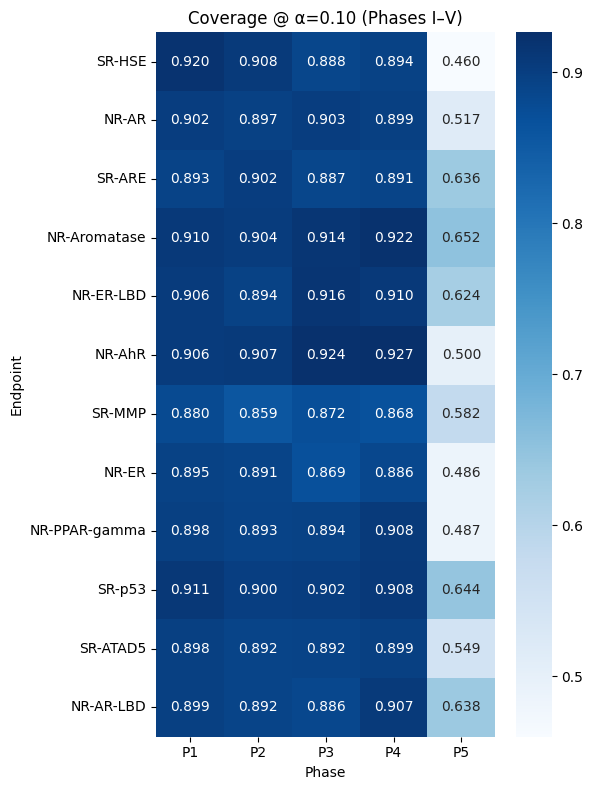

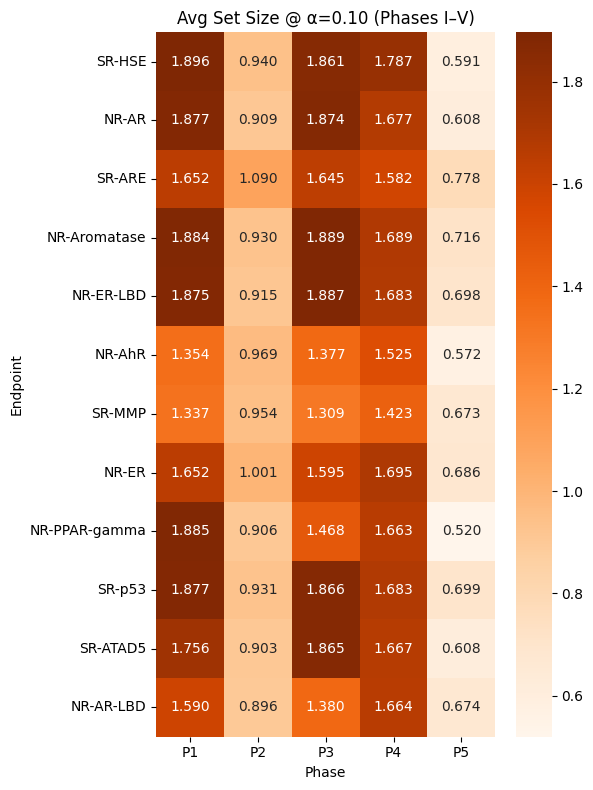

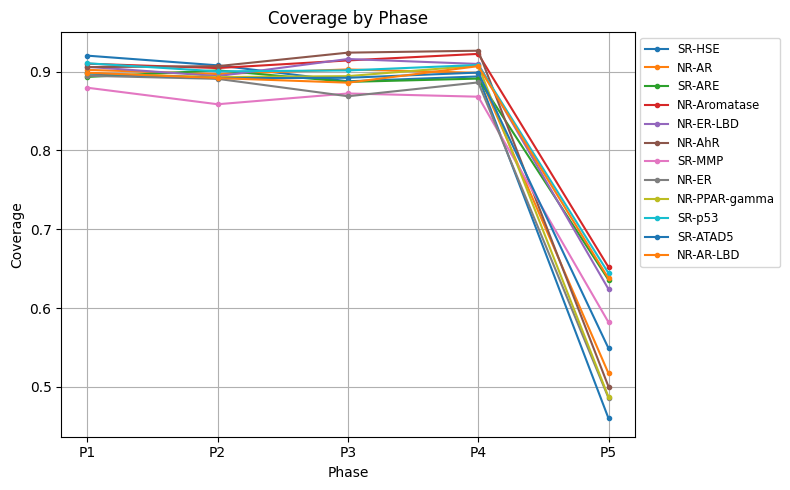

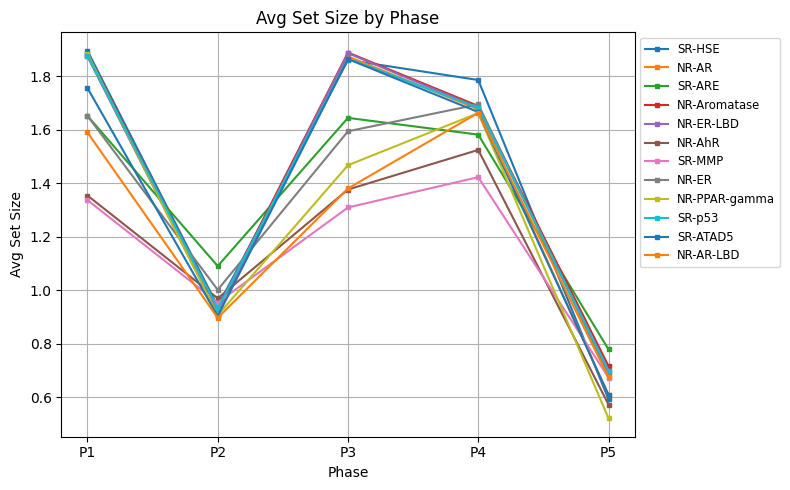

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load phase results
p1 = pd.read_csv('results/phase1_all_endpoints.csv')[['endpoint','alpha','coverage','avg_set_size']]
p2 = pd.read_csv('results/phase2_all_endpoints.csv')[['endpoint','alpha','cov_multi','size_multi']].rename(columns={'cov_multi':'coverage','size_multi':'avg_set_size'})
p3 = pd.read_csv('results/phase3_all_endpoints.csv')[['endpoint','alpha','coverage','avg_set_size']]
p4 = pd.read_csv('results/phase4_all_endpoints.csv')[['endpoint','alpha','coverage','avg_set_size']]
p5 = pd.read_csv('results/phase5_all_endpoints.csv')[['endpoint','alpha','coverage','avg_set_size']]

# round α to 2 decimals and filter at 0.10
for df in (p1,p2,p3,p4,p5):
    df['a2'] = df['alpha'].round(2)
alpha0 = 0.10
dfs = {
    'P1': p1[p1.a2==alpha0],
    'P2': p2[p2.a2==alpha0],
    'P3': p3[p3.a2==alpha0],
    'P4': p4[p4.a2==alpha0],
    'P5': p5[p5.a2==alpha0],
}
endpoints = p1['endpoint'].unique()
phases    = list(dfs.keys())

# build long table
records = []
for phase, df in dfs.items():
    cov_means = df.groupby('endpoint')['coverage'].mean()
    sz_means  = df.groupby('endpoint')['avg_set_size'].mean()
    for ep in endpoints:
        records.append({
            'endpoint': ep,
            'phase':    phase,
            'coverage': cov_means.get(ep, np.nan),
            'set_size': sz_means.get(ep,  np.nan)
        })
df_all = pd.DataFrame(records)

# 1) heatmap coverage
cov_piv = df_all.pivot(index='endpoint', columns='phase', values='coverage').loc[endpoints]
plt.figure(figsize=(6,8))
sns.heatmap(cov_piv, annot=True, fmt=".3f", cmap='Blues')
plt.title('Coverage @ α=0.10 (Phases I–V)')
plt.ylabel('Endpoint'); plt.xlabel('Phase')
plt.tight_layout(); plt.show()

# 2) heatmap set_size
sz_piv = df_all.pivot(index='endpoint', columns='phase', values='set_size').loc[endpoints]
plt.figure(figsize=(6,8))
sns.heatmap(sz_piv, annot=True, fmt=".3f", cmap='Oranges')
plt.title('Avg Set Size @ α=0.10 (Phases I–V)')
plt.ylabel('Endpoint'); plt.xlabel('Phase')
plt.tight_layout(); plt.show()

# 3) line coverage
plt.figure(figsize=(8,5))
for ep in endpoints:
    d = df_all[df_all.endpoint==ep].set_index('phase').loc[phases]
    plt.plot(phases, d.coverage, '-o', markersize=3, label=ep)
plt.title('Coverage by Phase'); plt.xlabel('Phase'); plt.ylabel('Coverage')
plt.legend(bbox_to_anchor=(1,1), fontsize='small'); plt.grid(True); plt.tight_layout(); plt.show()

# 4) line set_size
plt.figure(figsize=(8,5))
for ep in endpoints:
    d = df_all[df_all.endpoint==ep].set_index('phase').loc[phases]
    plt.plot(phases, d.set_size, '-s', markersize=3, label=ep)
plt.title('Avg Set Size by Phase'); plt.xlabel('Phase'); plt.ylabel('Avg Set Size')
plt.legend(bbox_to_anchor=(1,1), fontsize='small'); plt.grid(True); plt.tight_layout(); plt.show()


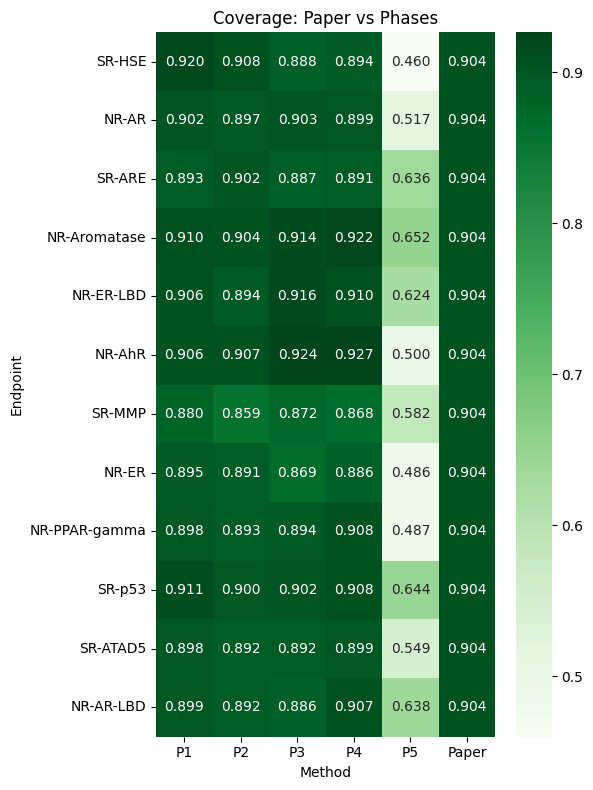

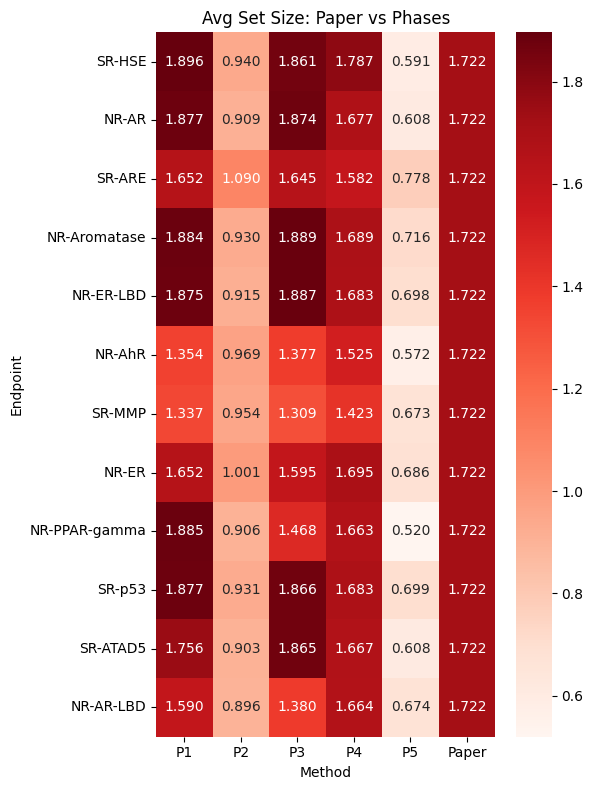

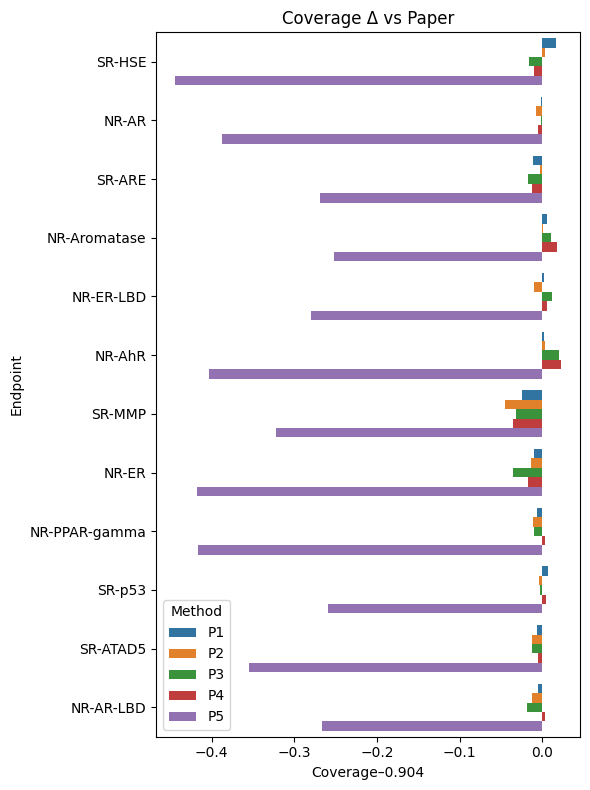

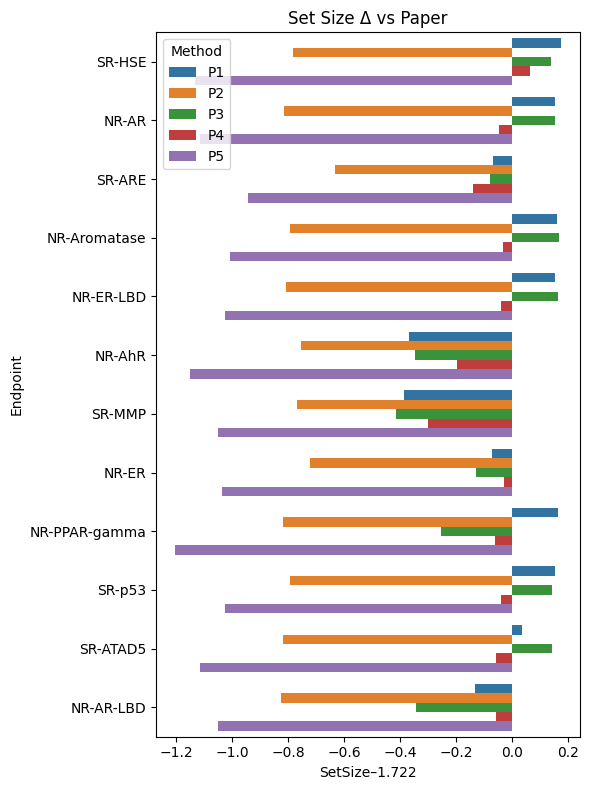

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# paper baseline
paper_cov, paper_sz = 0.904, 1.722

# load & round/filter α
p1 = pd.read_csv('results/phase1_all_endpoints.csv');     p1['a2']=p1.alpha.round(2); p1=p1[p1.a2==0.10]
p2 = pd.read_csv('results/phase2_all_endpoints.csv').rename(columns={'cov_multi':'coverage','size_multi':'avg_set_size'}); p2['a2']=p2.alpha.round(2); p2=p2[p2.a2==0.10]
p3 = pd.read_csv('results/phase3_all_endpoints.csv');     p3['a2']=p3.alpha.round(2); p3=p3[p3.a2==0.10]
p4 = pd.read_csv('results/phase4_all_endpoints.csv');     p4['a2']=p4.alpha.round(2); p4=p4[p4.a2==0.10]
p5 = pd.read_csv('results/phase5_all_endpoints.csv');     p5['a2']=p5.alpha.round(2); p5=p5[p5.a2==0.10]

endpoints = p1.endpoint.unique()
methods   = ['Paper','P1','P2','P3','P4','P5']

# build comparison DF
recs = []
for ep in endpoints:
    recs.append({'endpoint':ep,'method':'Paper','coverage':paper_cov,'set_size':paper_sz})
    for df,m in zip([p1,p2,p3,p4,p5], methods[1:]):
        cov = df.groupby('endpoint')['coverage'].mean().get(ep, np.nan)
        sz  = df.groupby('endpoint')['avg_set_size'].mean().get(ep, np.nan)
        recs.append({'endpoint':ep,'method':m,'coverage':cov,'set_size':sz})
df_cmp = pd.DataFrame(recs)

# 1) heatmap coverage
cov_p = df_cmp.pivot(index='endpoint',columns='method',values='coverage').loc[endpoints]
plt.figure(figsize=(6,8))
sns.heatmap(cov_p, annot=True, fmt=".3f", cmap='Greens')
plt.title('Coverage: Paper vs Phases'); plt.ylabel('Endpoint'); plt.xlabel('Method')
plt.tight_layout(); plt.show()

# 2) heatmap set_size
sz_p = df_cmp.pivot(index='endpoint',columns='method',values='set_size').loc[endpoints]
plt.figure(figsize=(6,8))
sns.heatmap(sz_p, annot=True, fmt=".3f", cmap='Reds')
plt.title('Avg Set Size: Paper vs Phases'); plt.ylabel('Endpoint'); plt.xlabel('Method')
plt.tight_layout(); plt.show()

# 3) bar Δ coverage vs paper
df_cmp['cov_diff'] = df_cmp.coverage - paper_cov
plt.figure(figsize=(6,8))
sns.barplot(data=df_cmp[df_cmp.method!='Paper'], y='endpoint', x='cov_diff', hue='method')
plt.title('Coverage Δ vs Paper'); plt.xlabel('Coverage–0.904'); plt.ylabel('Endpoint')
plt.legend(title='Method'); plt.tight_layout(); plt.show()

# 4) bar Δ set_size vs paper
df_cmp['sz_diff'] = df_cmp.set_size - paper_sz
plt.figure(figsize=(6,8))
sns.barplot(data=df_cmp[df_cmp.method!='Paper'], y='endpoint', x='sz_diff', hue='method')
plt.title('Set Size Δ vs Paper'); plt.xlabel('SetSize–1.722'); plt.ylabel('Endpoint')
plt.legend(title='Method'); plt.tight_layout(); plt.show()



— Visualizing P1 —


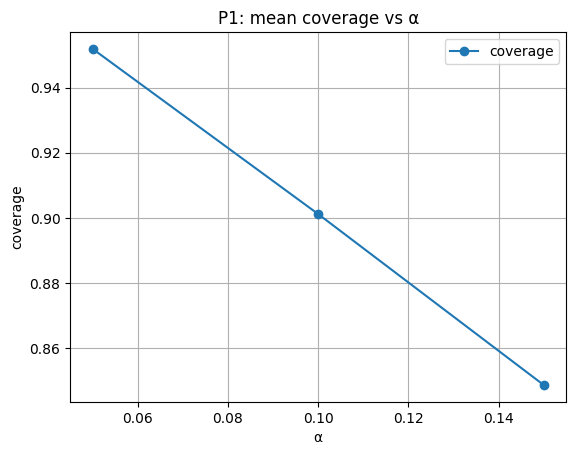

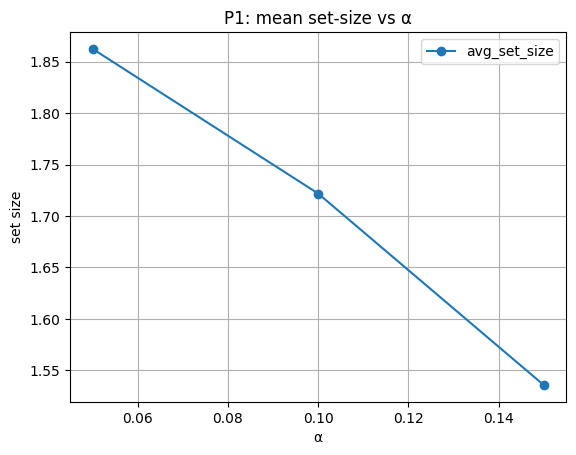

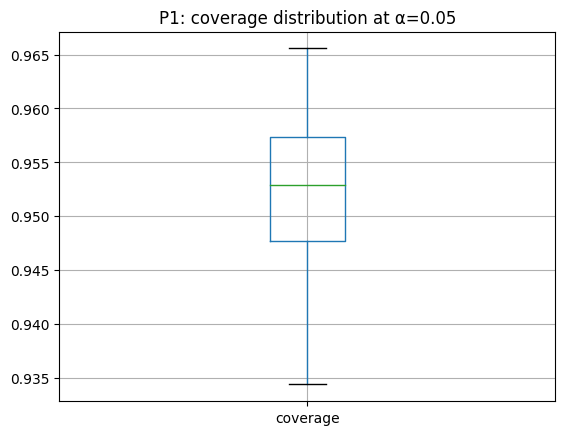

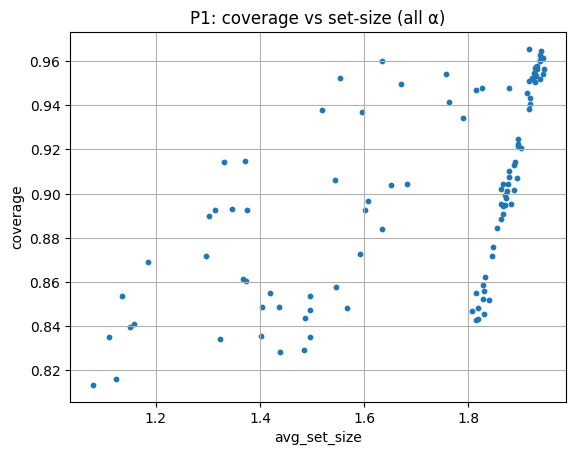


— Visualizing P2 —


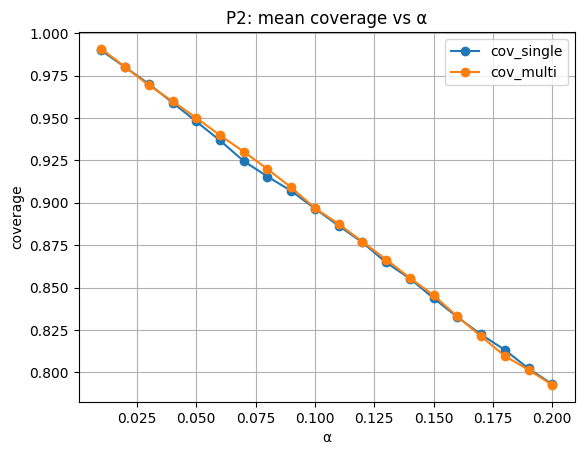

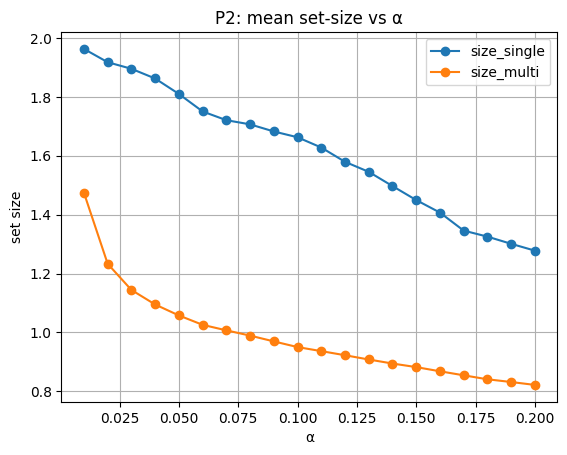

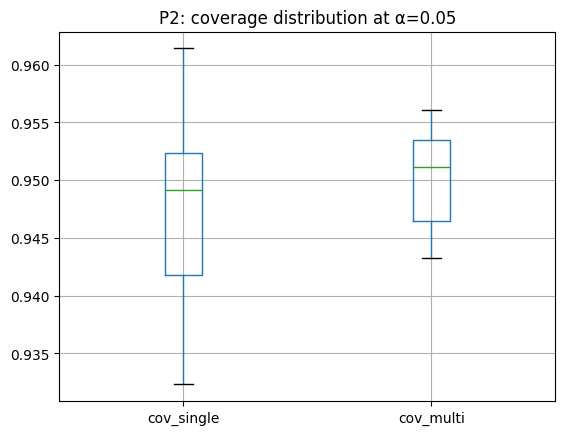

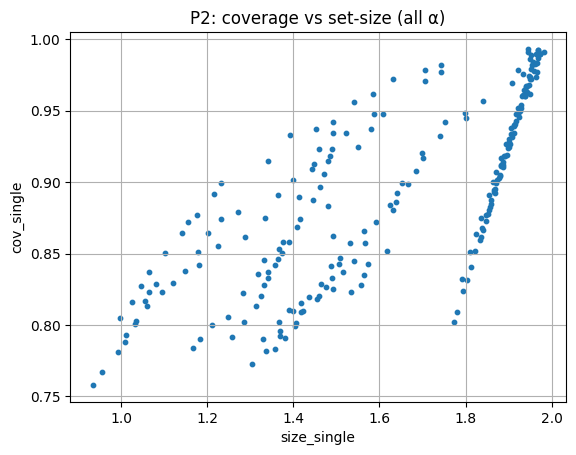


— Visualizing P3 —


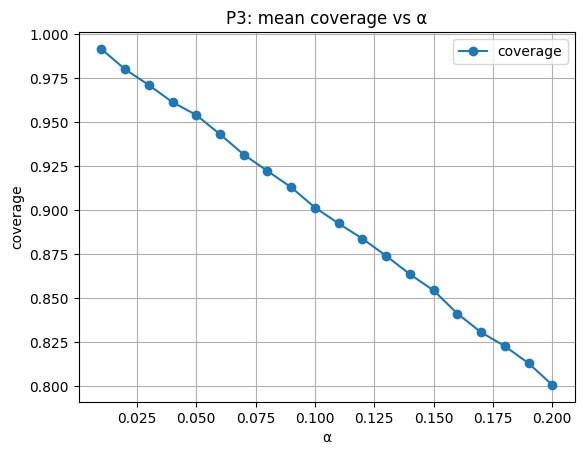

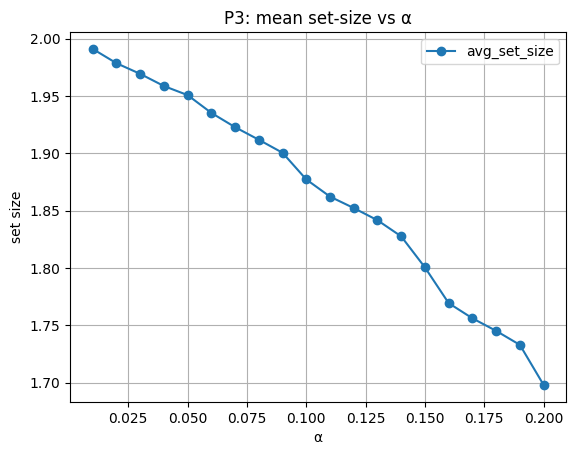

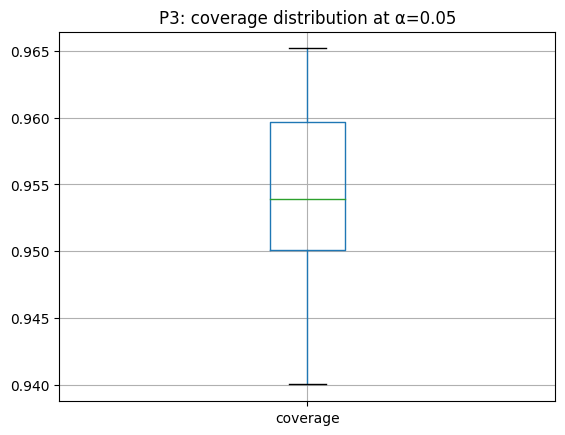

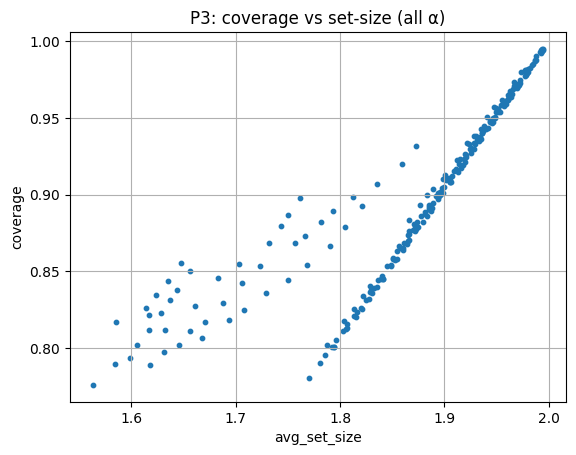


— Visualizing P4 —


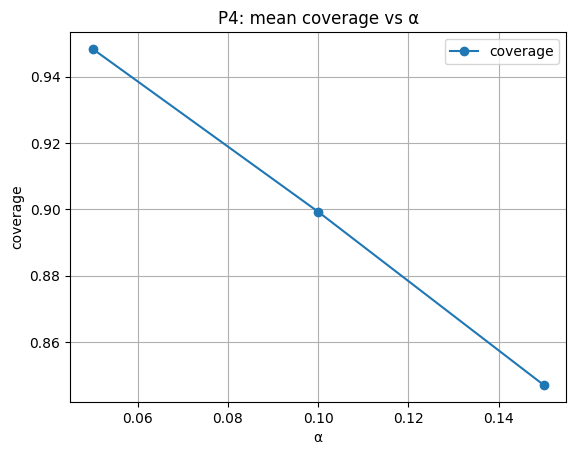

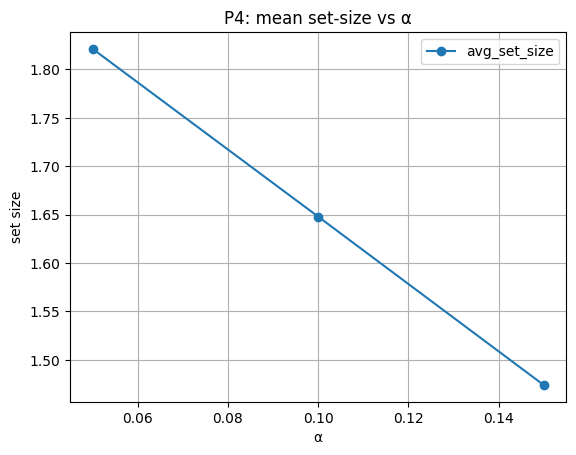

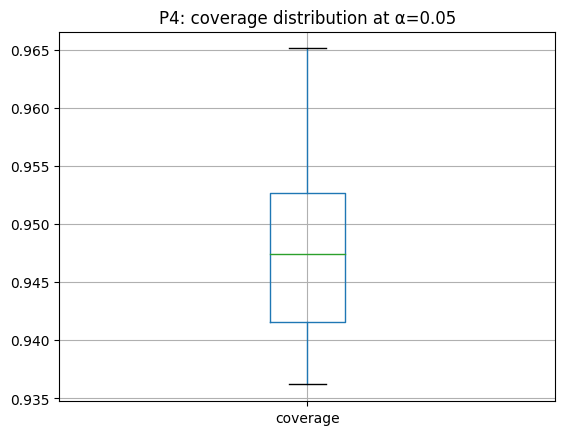

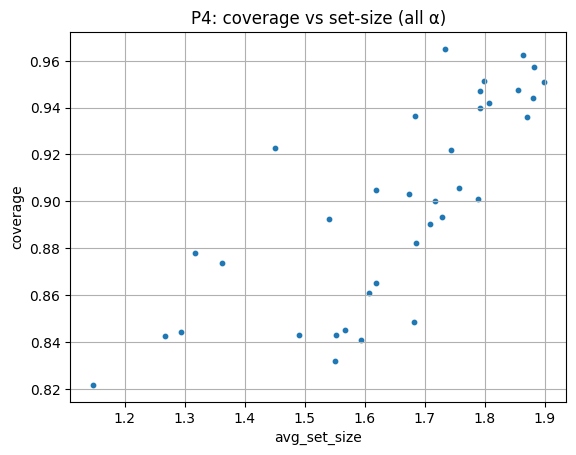


— Visualizing P5 —


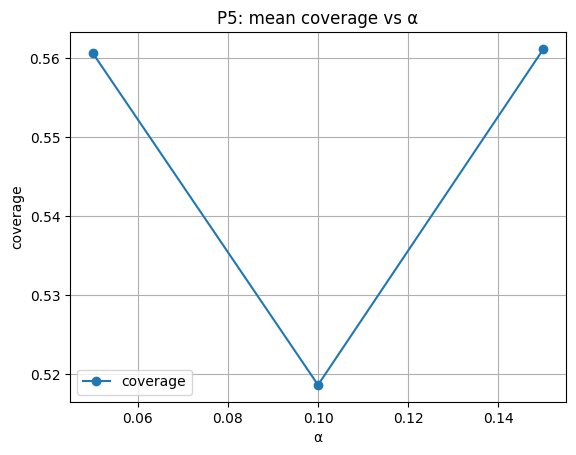

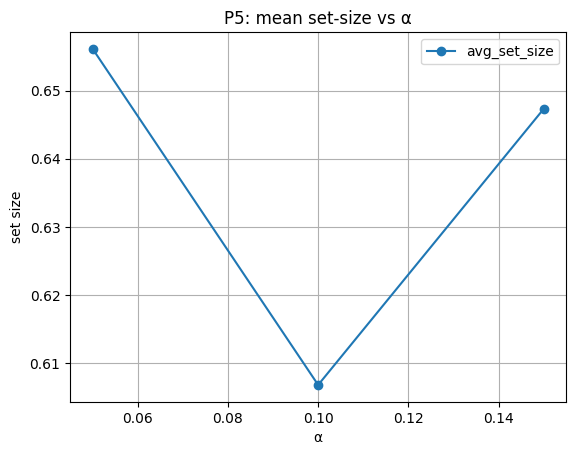

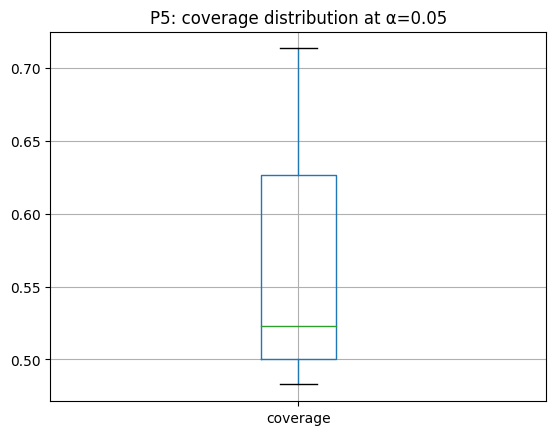

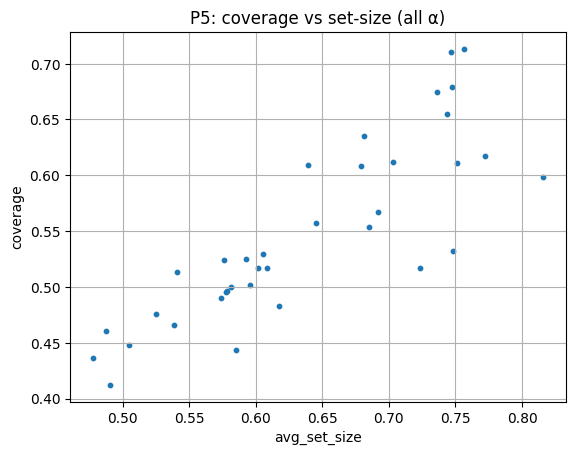


— Cross-phase comparisons —


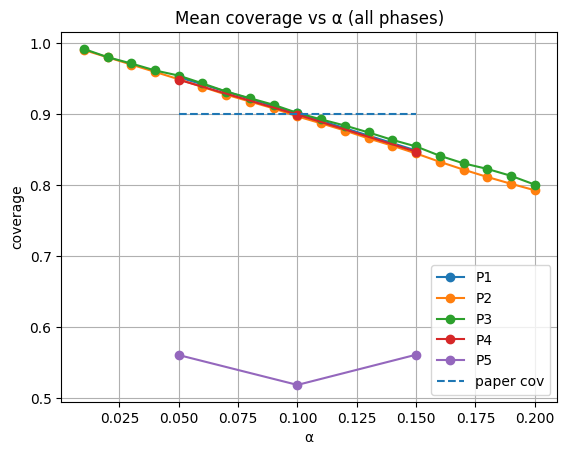

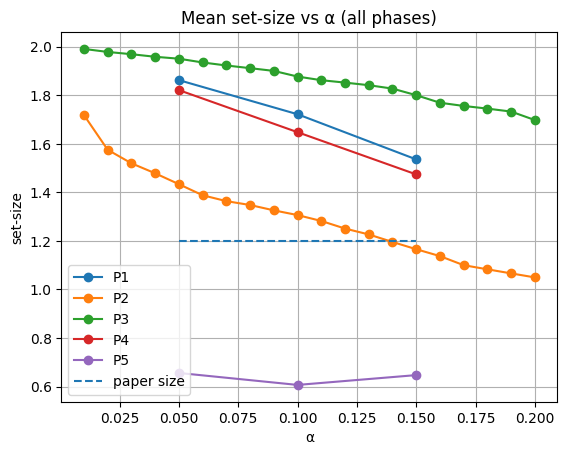

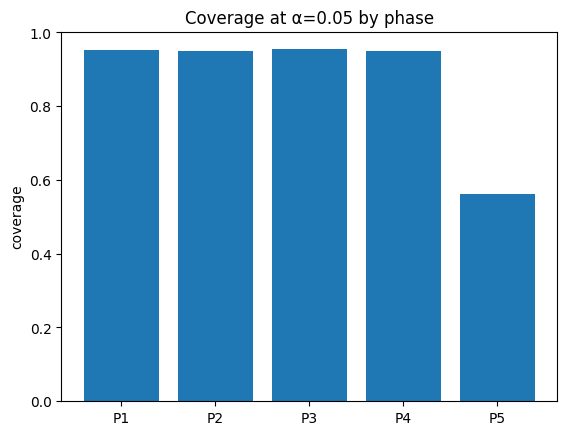

Done; all plots saved and displayed.


In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Phase → result CSV
phase_files = {
    'P1': 'results/phase1_all_endpoints.csv',
    'P2': 'results/phase2_all_endpoints.csv',
    'P3': 'results/phase3_all_endpoints.csv',
    'P4': 'results/phase4_all_endpoints.csv',
    'P5': 'results/phase5_all_endpoints.csv',
}

paper_cov  = 0.90
paper_size = 1.2

os.makedirs('plots', exist_ok=True)

# per-phase plotting
for phase, path in phase_files.items():
    print(f"\n— Visualizing {phase} —")
    df = pd.read_csv(path)
    alphas = sorted(df['alpha'].unique())
    if phase == 'P2':
        cov_cols  = ['cov_single','cov_multi']
        size_cols = ['size_single','size_multi']
    else:
        cov_cols  = ['coverage']
        size_cols = ['avg_set_size']

    # 1) mean coverage vs α
    plt.figure()
    for c in cov_cols:
        m = df.groupby('alpha')[c].mean()
        plt.plot(alphas, m.values, '-o', label=c)
    plt.title(f'{phase}: mean coverage vs α')
    plt.xlabel('α'); plt.ylabel('coverage')
    plt.legend(); plt.grid(True)
    plt.savefig(f'plots/{phase}_mean_coverage.png')
    plt.show()
    plt.close()

    # 2) mean set‐size vs α
    plt.figure()
    for s in size_cols:
        m = df.groupby('alpha')[s].mean()
        plt.plot(alphas, m.values, '-o', label=s)
    plt.title(f'{phase}: mean set‐size vs α')
    plt.xlabel('α'); plt.ylabel('set size')
    plt.legend(); plt.grid(True)
    plt.savefig(f'plots/{phase}_mean_setsize.png')
    plt.show()
    plt.close()

    # 3) boxplot of coverage at α=0.05
    sub = df[df['alpha']==0.05]
    plt.figure()
    sub[cov_cols].boxplot()
    plt.title(f'{phase}: coverage distribution at α=0.05')
    plt.savefig(f'plots/{phase}_coverage_box_alpha05.png')
    plt.show()
    plt.close()

    # 4) scatter coverage vs set‐size
    plt.figure()
    plt.scatter(df[size_cols[0]], df[cov_cols[0]], s=10)
    plt.title(f'{phase}: coverage vs set‐size (all α)')
    plt.xlabel(size_cols[0]); plt.ylabel(cov_cols[0])
    plt.grid(True)
    plt.savefig(f'plots/{phase}_scatter_cov_vs_size.png')
    plt.show()
    plt.close()

# cross‐phase comparisons
print("\n— Cross-phase comparisons —")
# coverage vs α
plt.figure()
for phase, path in phase_files.items():
    df = pd.read_csv(path)
    if phase == 'P2':
        avg = df.groupby('alpha')[['cov_single','cov_multi']].mean().mean(axis=1)
    else:
        avg = df.groupby('alpha')['coverage'].mean()
    plt.plot(sorted(df['alpha'].unique()), avg.values, '-o', label=phase)
plt.hlines(paper_cov, xmin=min(alphas), xmax=max(alphas), linestyles='--', label='paper cov')
plt.title('Mean coverage vs α (all phases)')
plt.xlabel('α'); plt.ylabel('coverage')
plt.legend(); plt.grid(True)
plt.savefig('plots/all_phases_coverage_vs_alpha.png')
plt.show()
plt.close()

# set‐size vs α
plt.figure()
for phase, path in phase_files.items():
    df = pd.read_csv(path)
    if phase == 'P2':
        avg = df.groupby('alpha')[['size_single','size_multi']].mean().mean(axis=1)
    else:
        avg = df.groupby('alpha')['avg_set_size'].mean()
    plt.plot(sorted(df['alpha'].unique()), avg.values, '-o', label=phase)
plt.hlines(paper_size, xmin=min(alphas), xmax=max(alphas), linestyles='--', label='paper size')
plt.title('Mean set‐size vs α (all phases)')
plt.xlabel('α'); plt.ylabel('set‐size')
plt.legend(); plt.grid(True)
plt.savefig('plots/all_phases_setsize_vs_alpha.png')
plt.show()
plt.close()

# bar chart coverage at α=0.05
cov05 = {}
for phase, path in phase_files.items():
    df = pd.read_csv(path)
    sub = df[df['alpha']==0.05]
    if phase=='P2':
        cov05[phase] = ((sub['cov_single']+sub['cov_multi'])/2).mean()
    else:
        cov05[phase] = sub['coverage'].mean()
plt.figure()
plt.bar(cov05.keys(), cov05.values())
plt.title('Coverage at α=0.05 by phase')
plt.ylabel('coverage')
plt.savefig('plots/coverage_bar_alpha05_all_phases.png')
plt.show()
plt.close()

print("Done; all plots saved and displayed.")
